# Exploratory Data Analysis (EDA) Script


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis
from scipy import linalg
from pandas.plotting import scatter_matrix

# 1. Basic Overview

In [2]:
# Load data
df = pd.read_csv("merged_dataset_cleaned.csv")

print("\n--- Shape of Dataset ---")
print(df.shape)

print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())



--- Shape of Dataset ---
(319795, 19)

--- Column Names ---
['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PoorPhysicalHealth(Days)', 'PoorMentalHealth(Days)', 'Sex', 'AgeCategory', 'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'BMI_Group', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Alcohol_Consumption']

--- Data Types ---
HeartDisease                     object
BMI                             float64
Smoking                          object
AlcoholDrinking                  object
Stroke                           object
PoorPhysicalHealth(Days)          int64
PoorMentalHealth(Days)            int64
Sex                              object
AgeCategory                      object
Race                             object
PhysicalActivity                 object
GenHealth                        object
SleepTime                         int64
Asthma                           object
BMI_Group                        object

# 2. Descriptive Statistics

In [3]:
print("\n--- Descriptive Statistics (Numeric) ---")
print(df.describe())

print("\n--- Descriptive Statistics (Categorical) ---")
print(df.describe(include='object'))




--- Descriptive Statistics (Numeric) ---
                 BMI  PoorPhysicalHealth(Days)  PoorMentalHealth(Days)  \
count  319795.000000              319795.00000           319795.000000   
mean       28.325399                   3.37171                3.898366   
std         6.356100                   7.95085                7.955235   
min        12.020000                   0.00000                0.000000   
25%        24.030000                   0.00000                0.000000   
50%        27.340000                   0.00000                0.000000   
75%        31.420000                   2.00000                3.000000   
max        94.850000                  30.00000               30.000000   

           SleepTime  Fruit_Consumption  Green_Vegetables_Consumption  \
count  319795.000000      319795.000000                 319795.000000   
mean        7.097075          29.725195                     15.121965   
std         1.436007           3.265824                      1.935144   

# 3. Categorical Variable Counts

In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n--- Value Counts: {col} ---")
    print(df[col].value_counts())



--- Value Counts: HeartDisease ---
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

--- Value Counts: Smoking ---
Smoking
No     187887
Yes    131908
Name: count, dtype: int64

--- Value Counts: AlcoholDrinking ---
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

--- Value Counts: Stroke ---
Stroke
No     307726
Yes     12069
Name: count, dtype: int64

--- Value Counts: Sex ---
Sex
Female    167805
Male      151990
Name: count, dtype: int64

--- Value Counts: AgeCategory ---
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

--- Value Counts: Race ---
Race
White                             245212
Hispanic                           27446
Black                              22939
Other      

# 4. Univariate Distributions

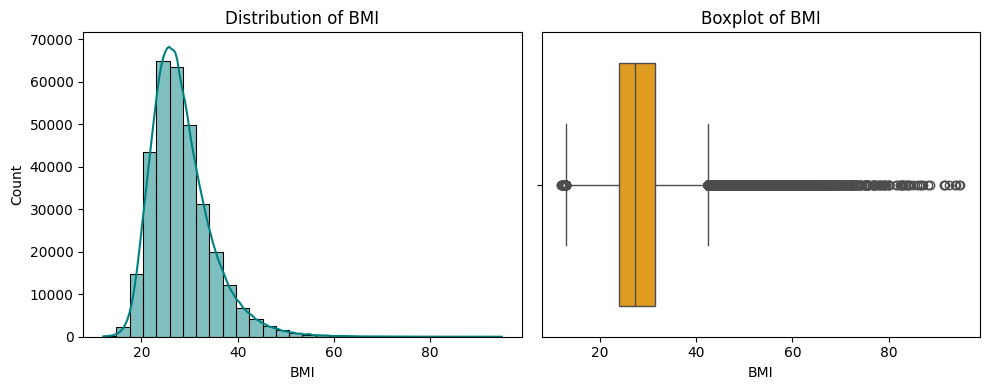

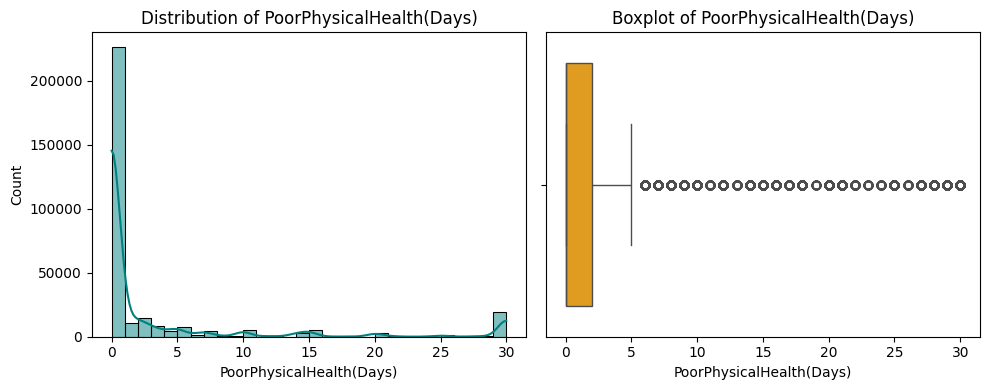

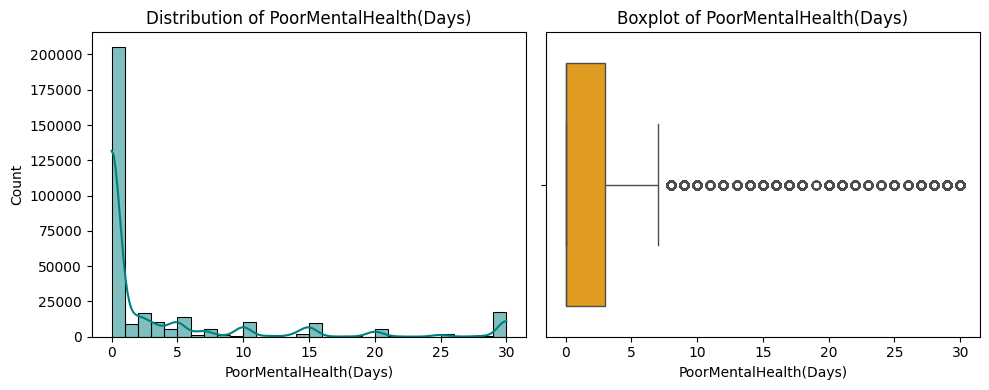

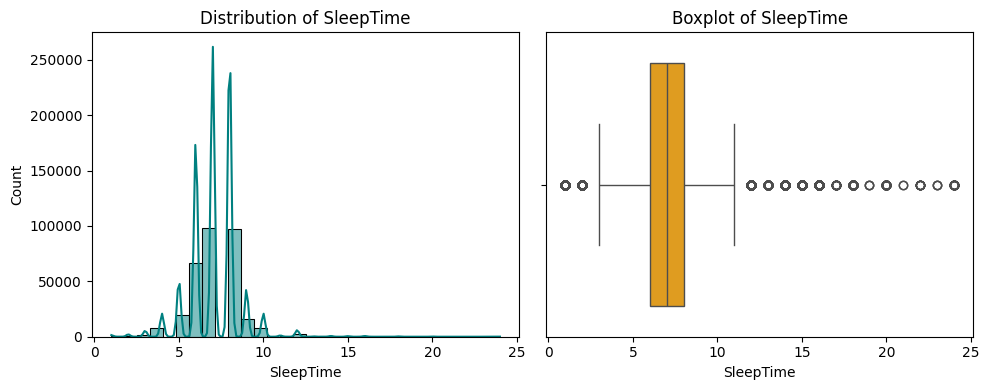

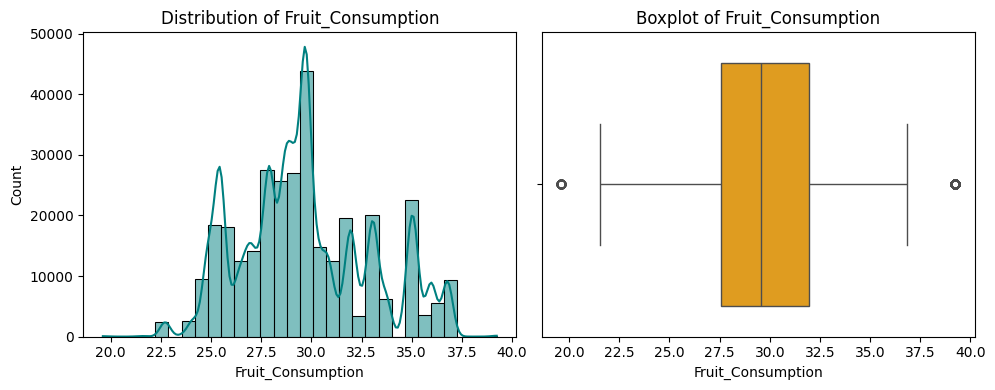

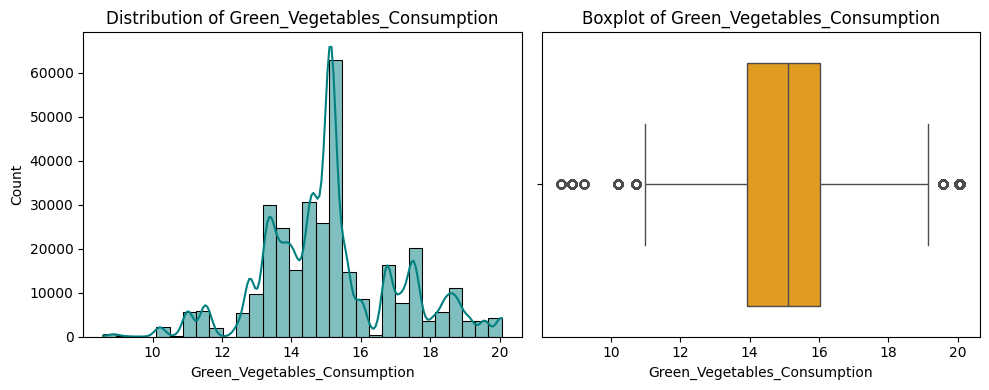

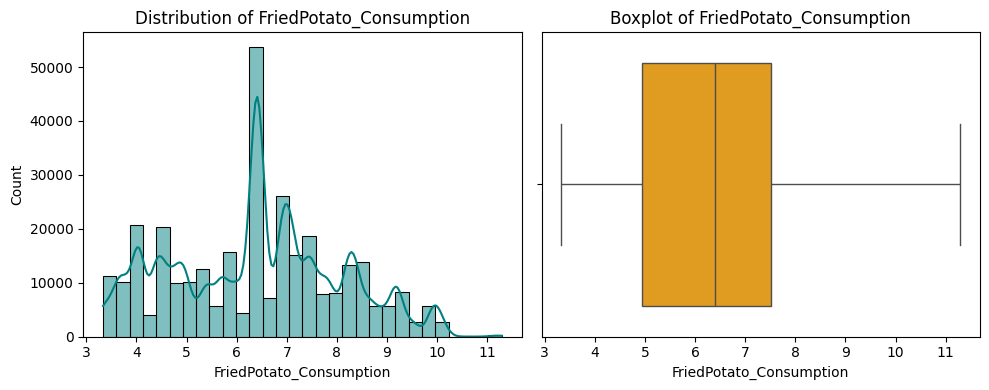

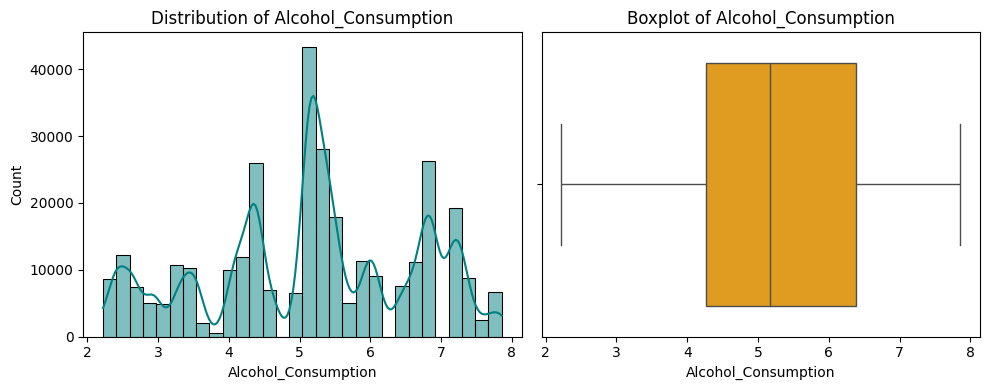

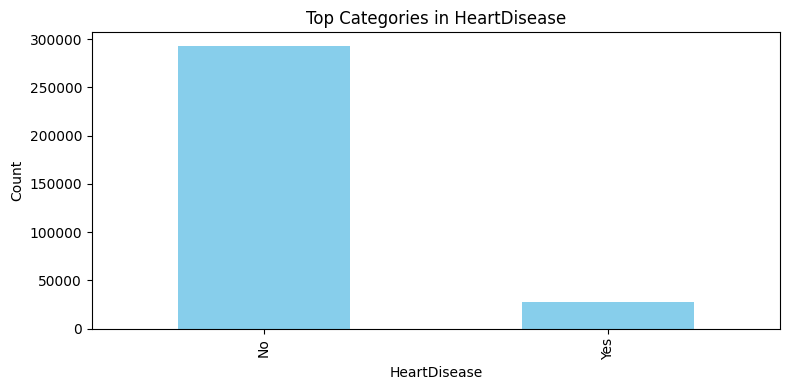

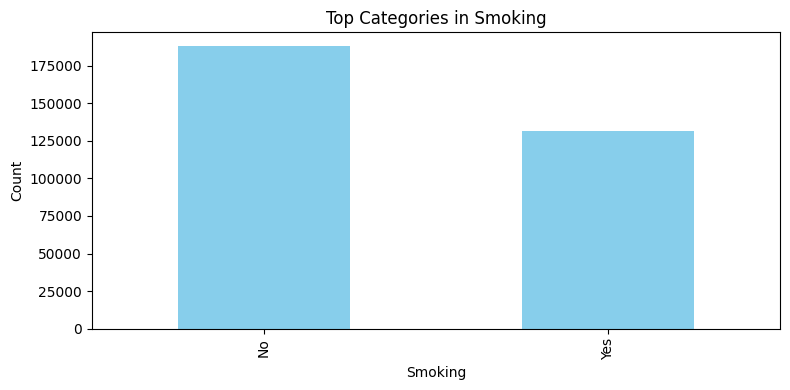

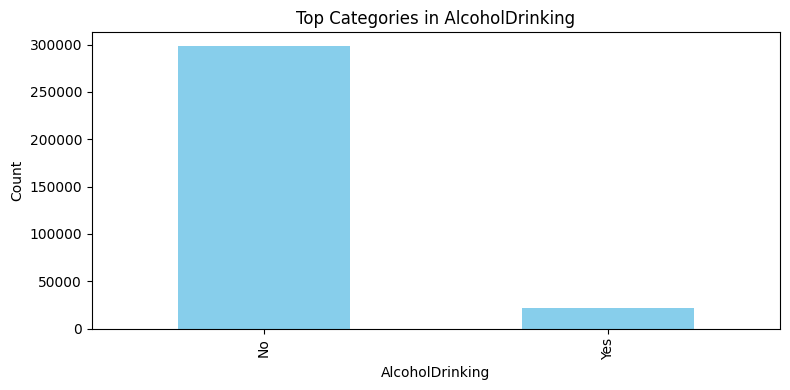

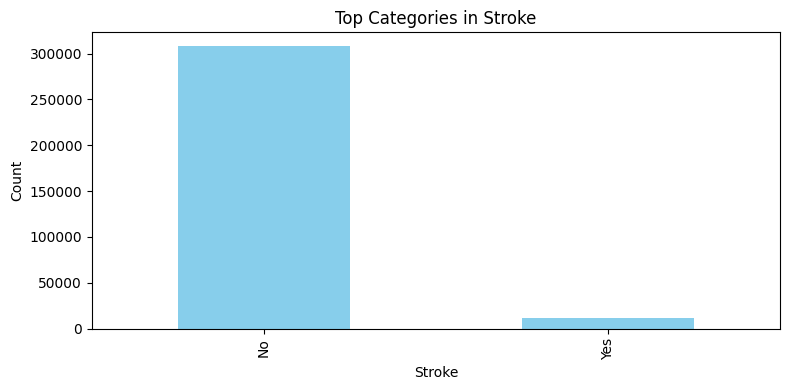

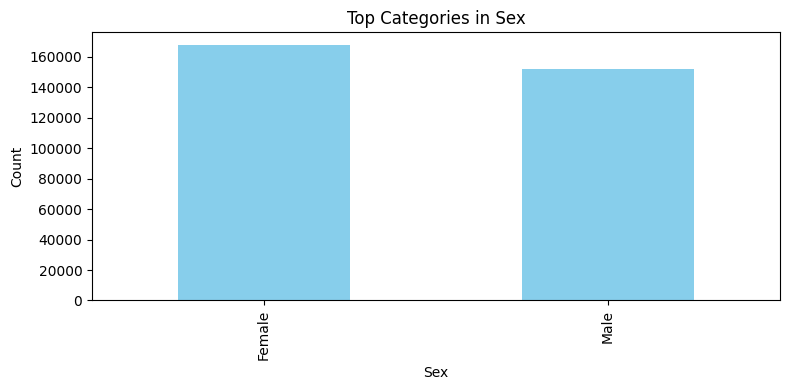

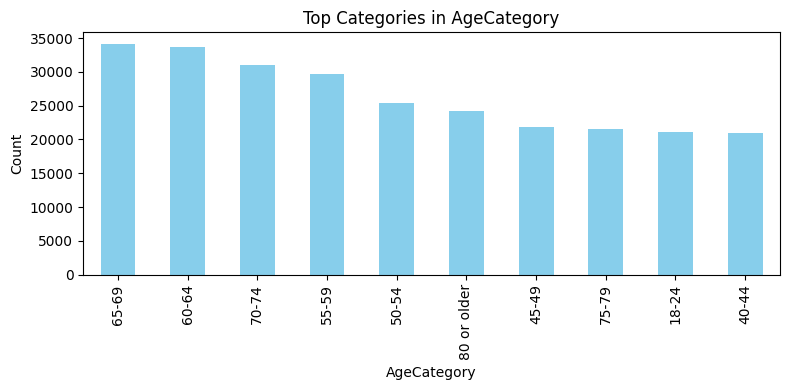

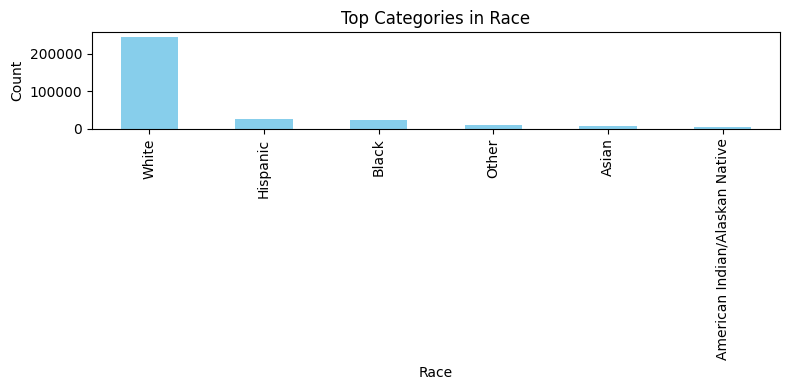

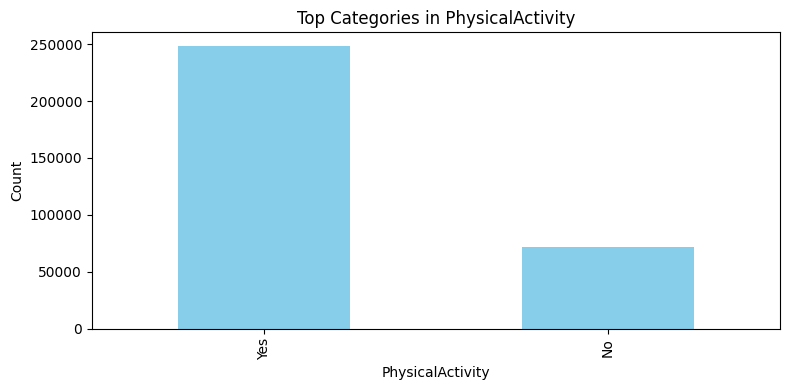

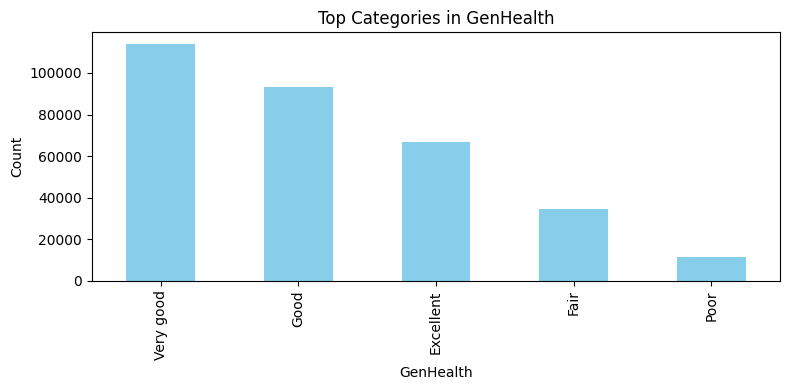

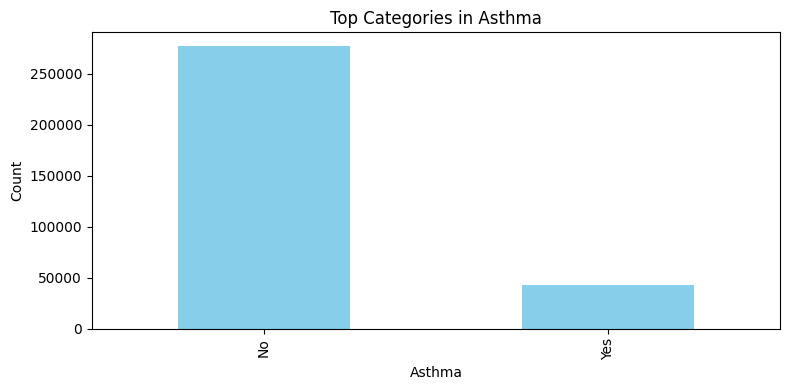

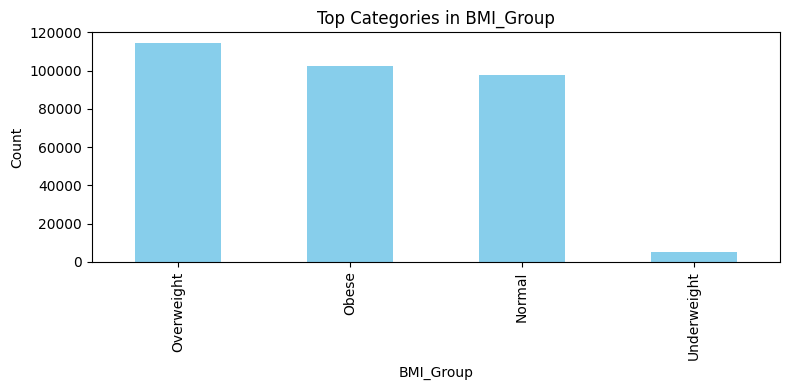

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# ---- Numeric Columns ----
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# ---- Categorical Columns ----
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# 5. Bivariate Analysis

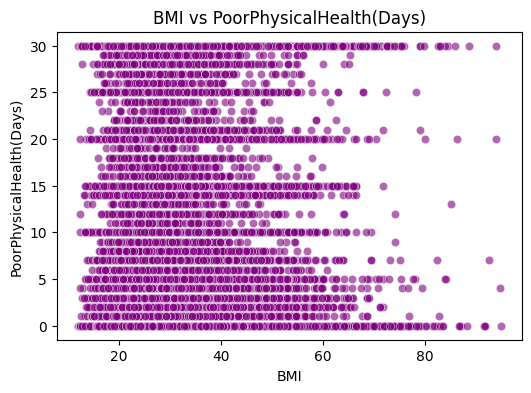

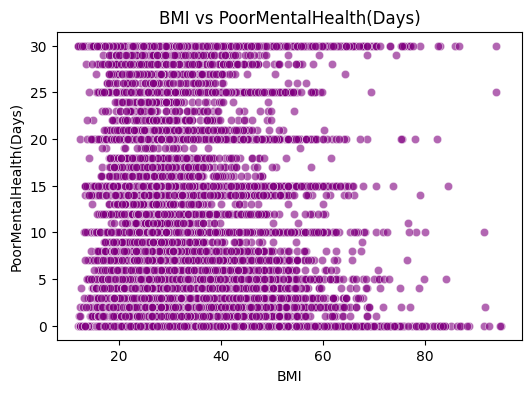

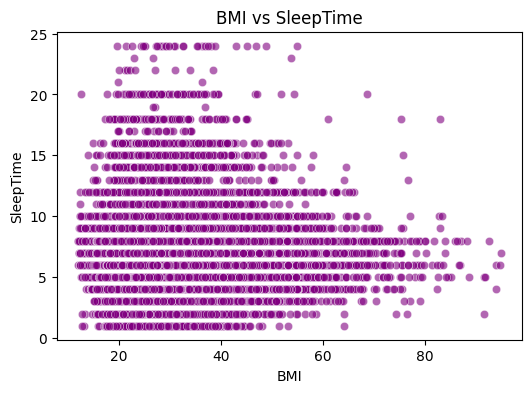

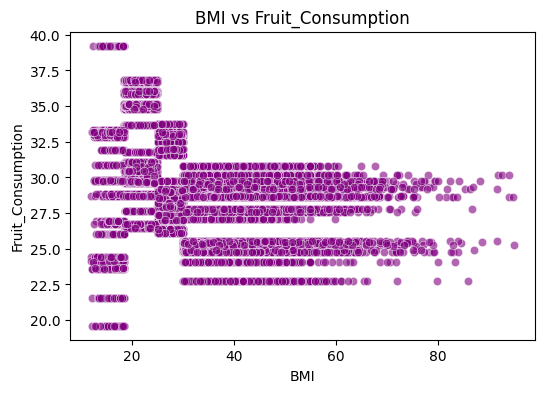

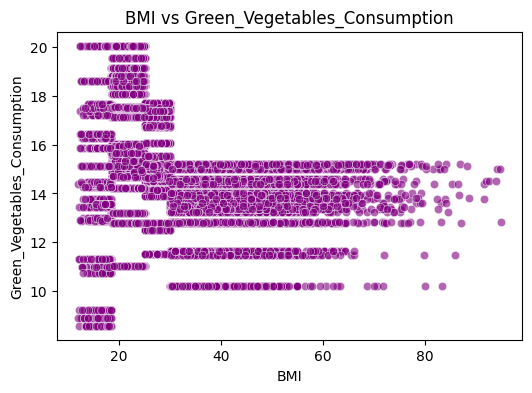

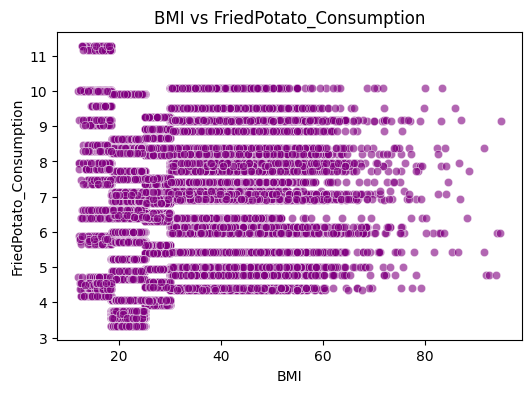

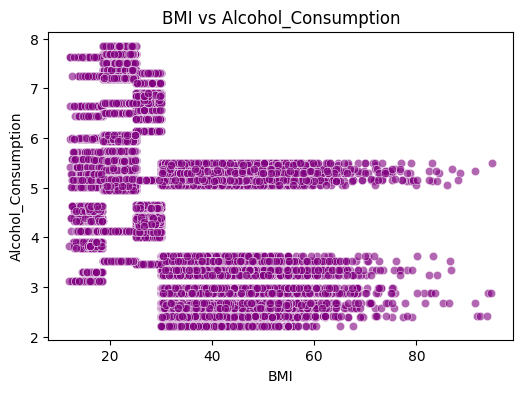

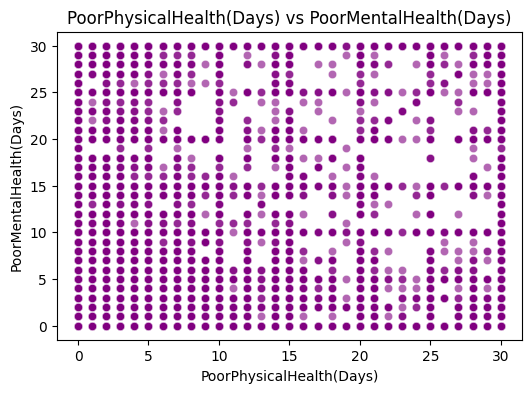

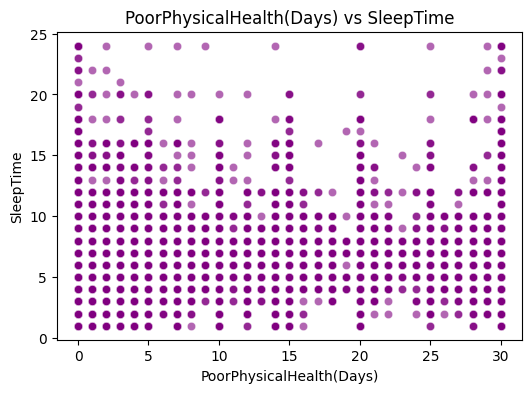

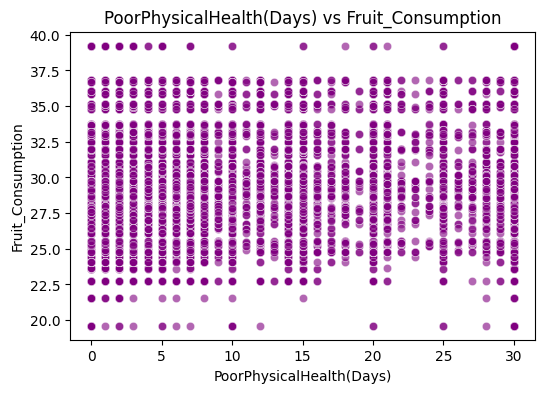

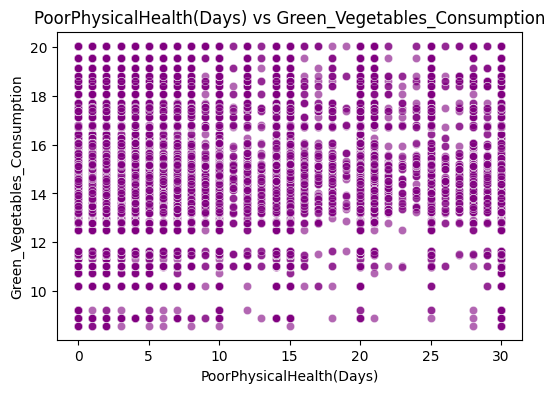

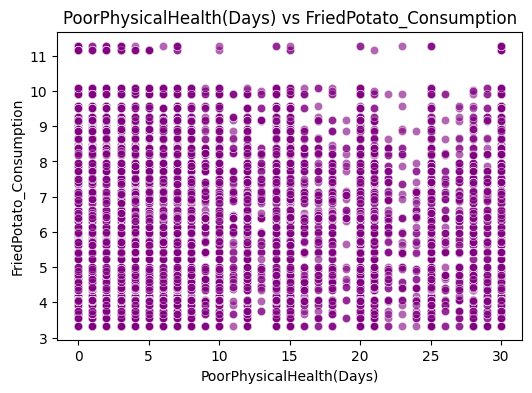

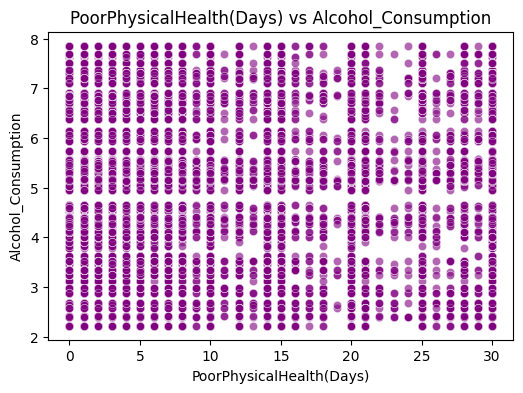

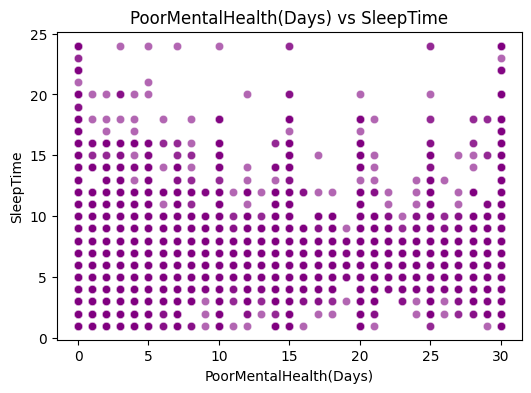

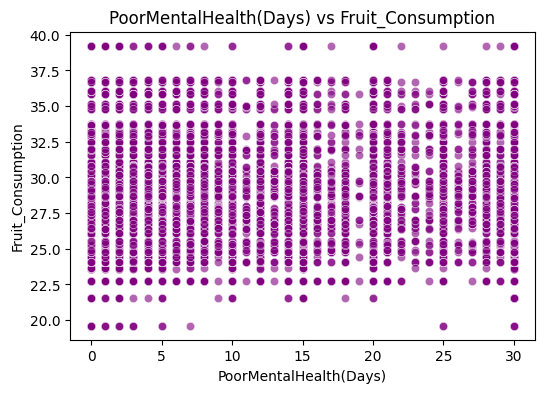

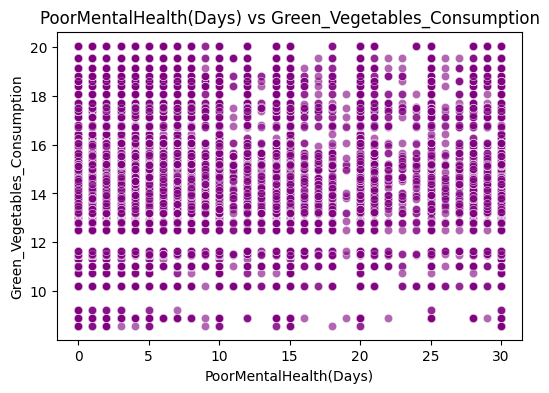

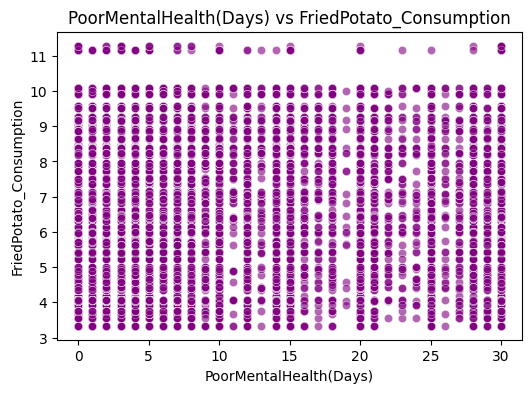

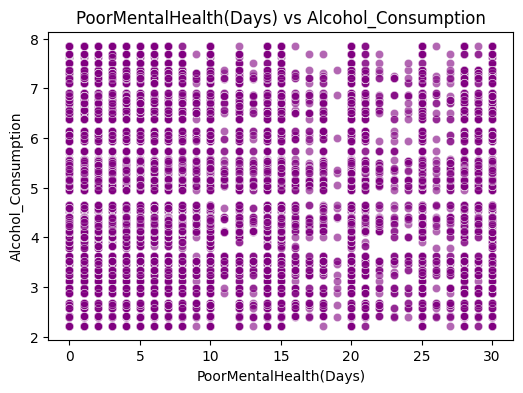

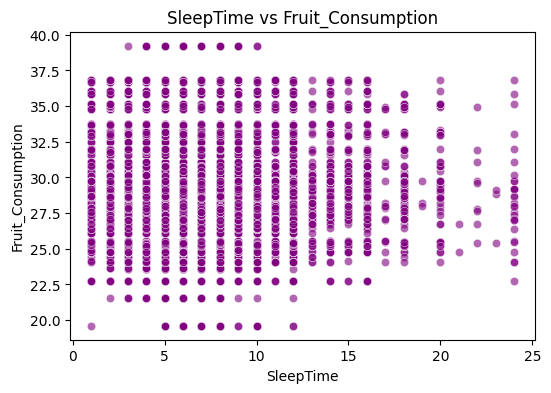

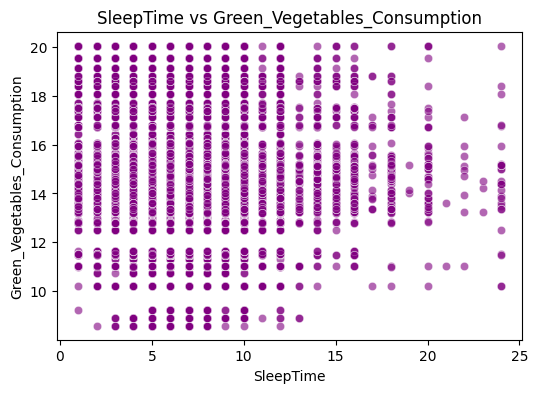

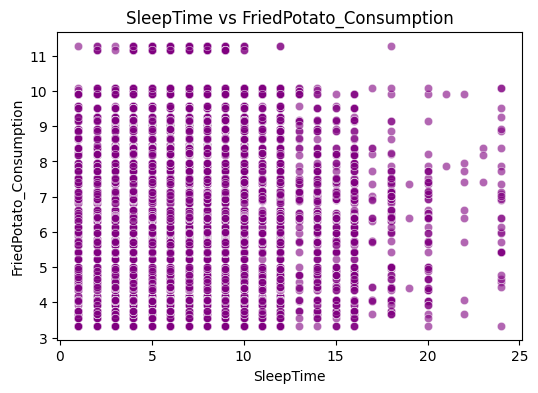

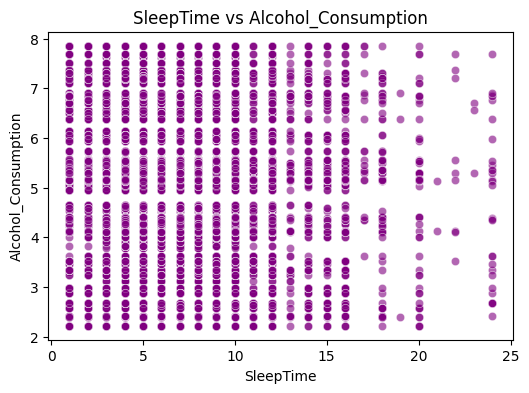

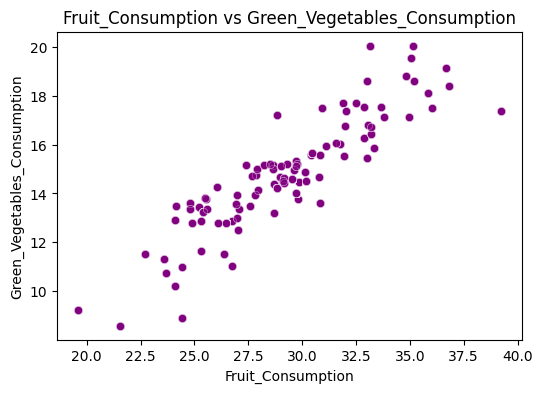

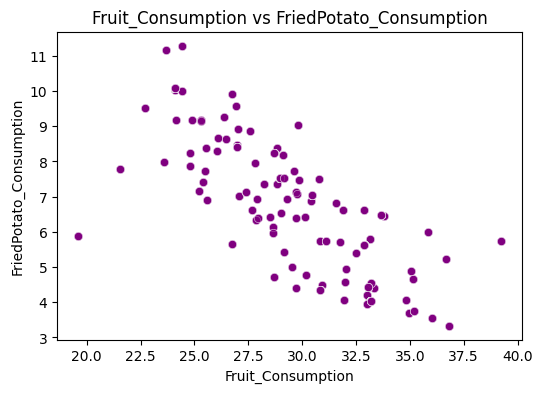

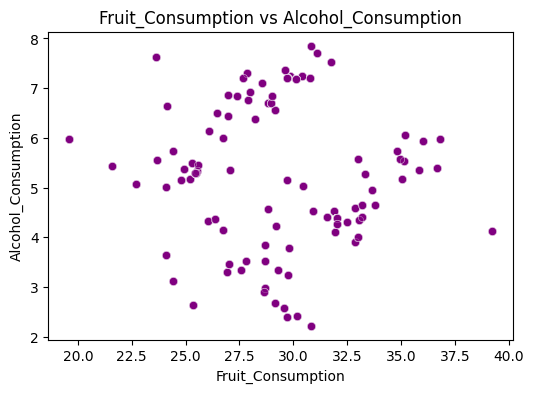

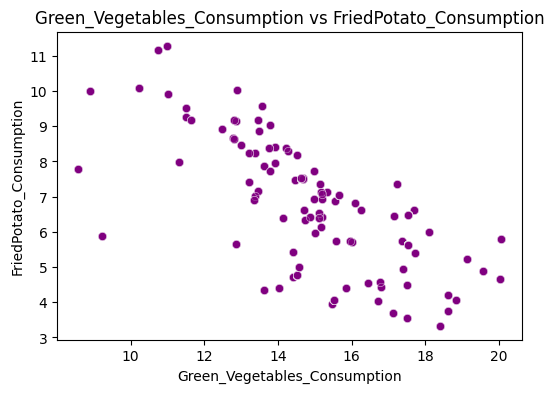

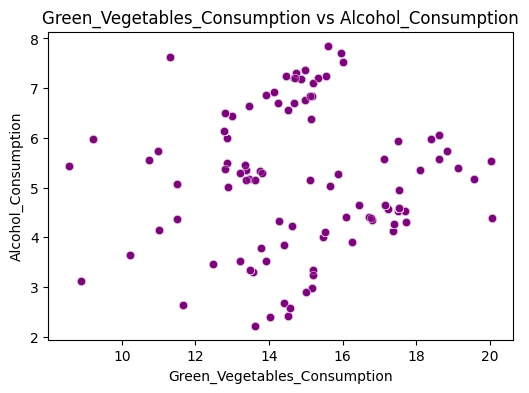

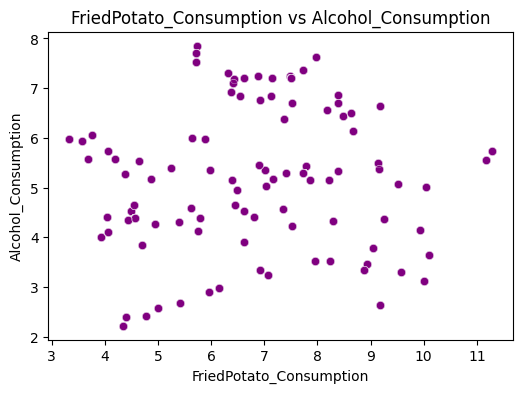

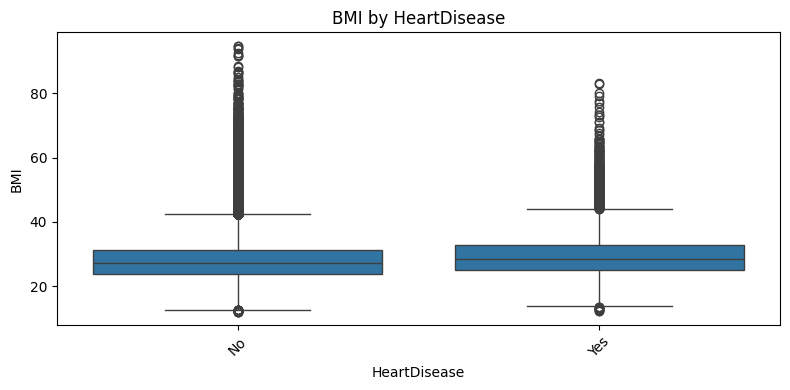

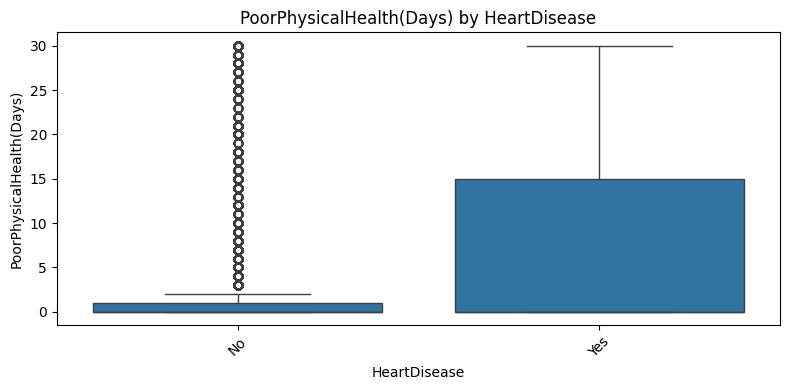

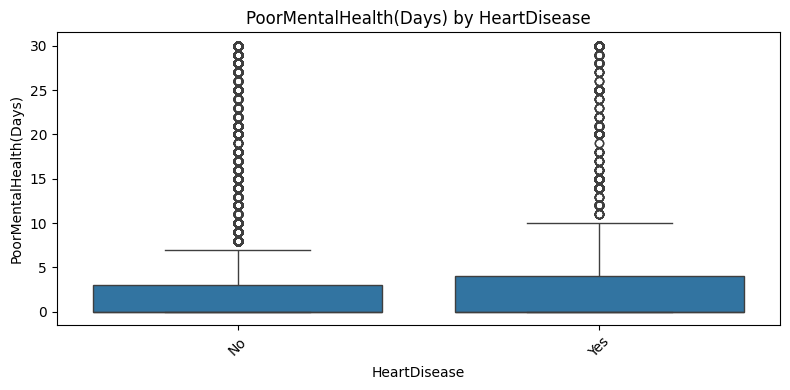

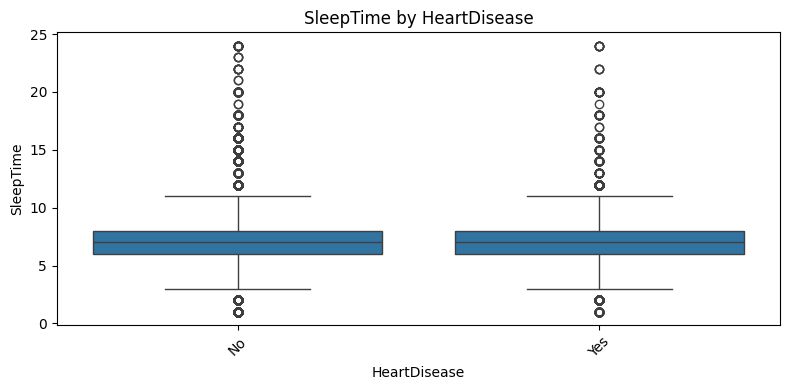

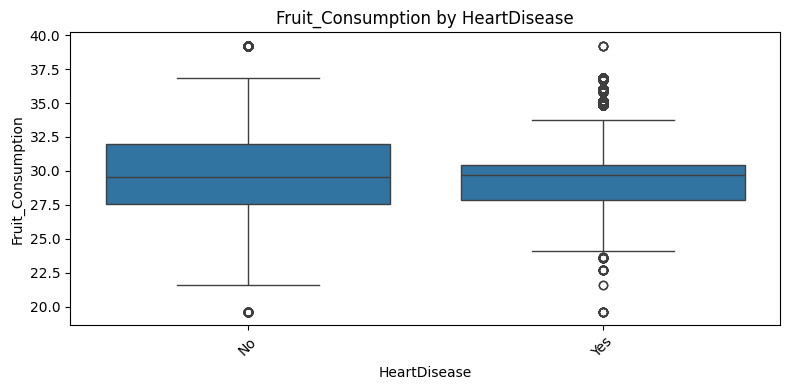

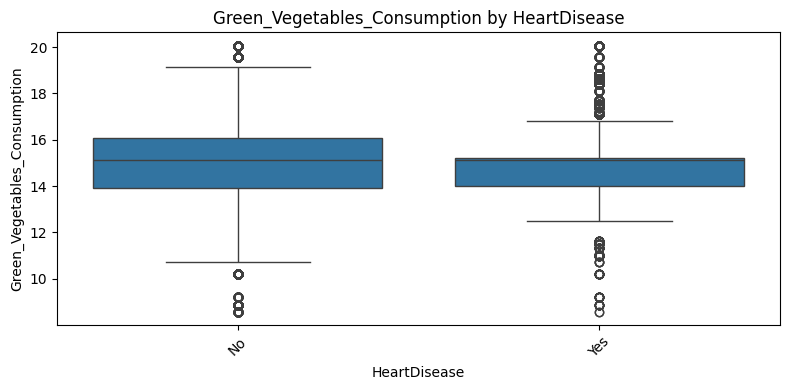

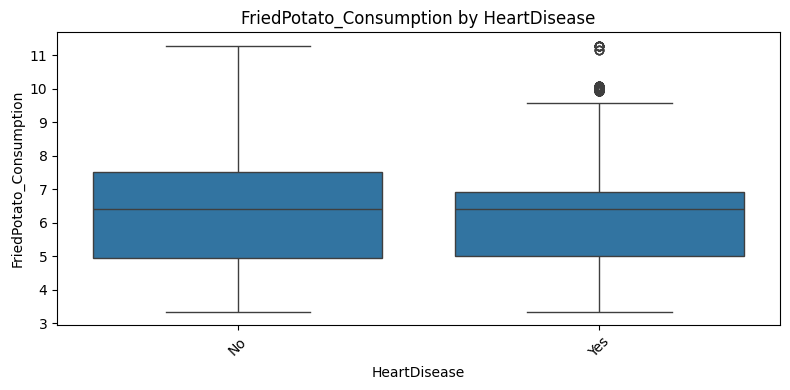

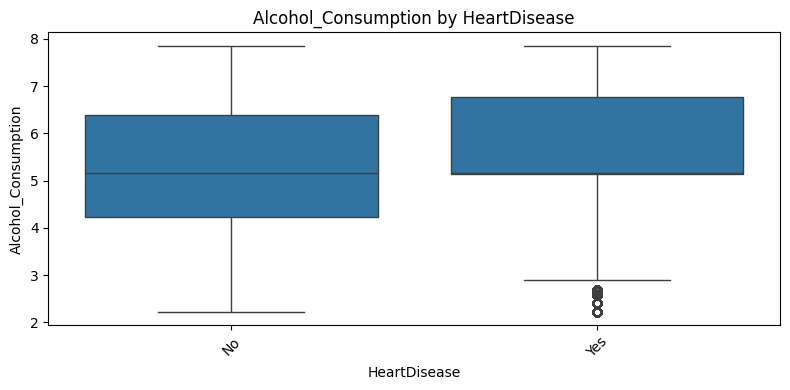

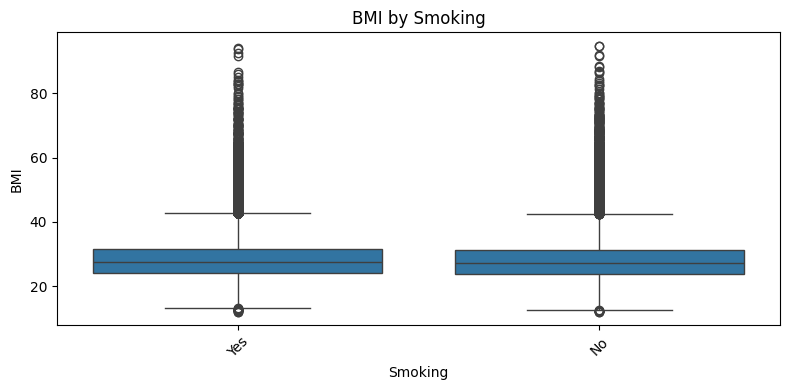

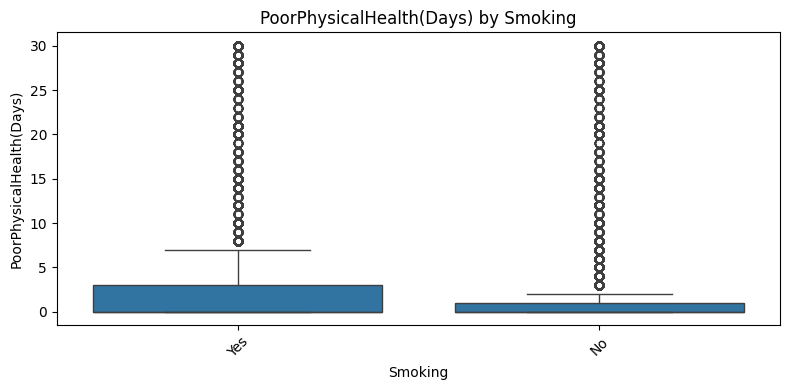

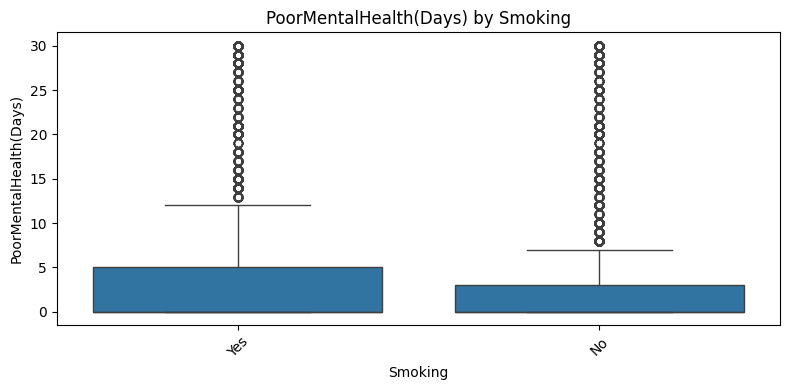

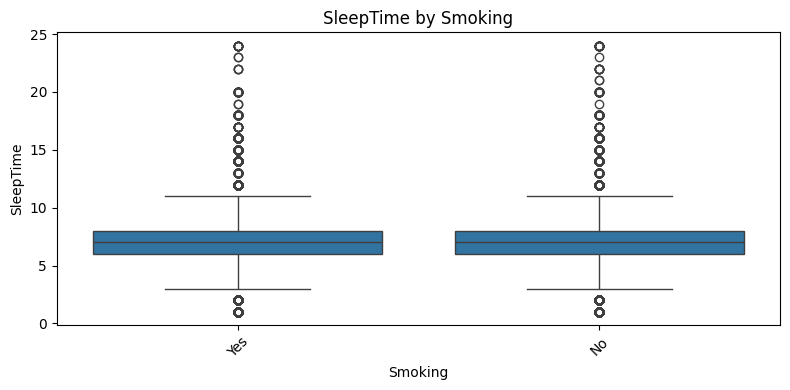

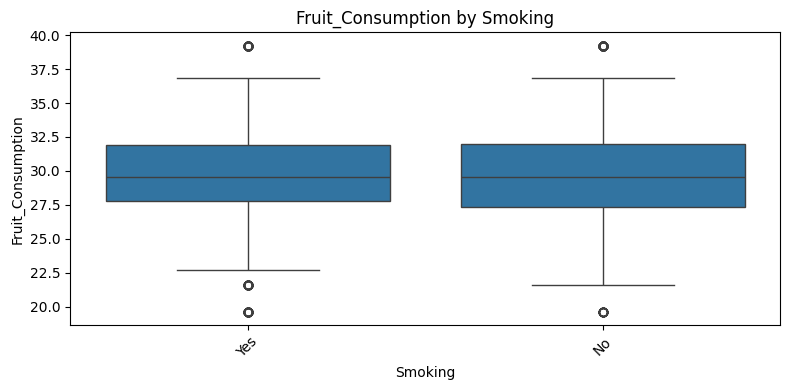

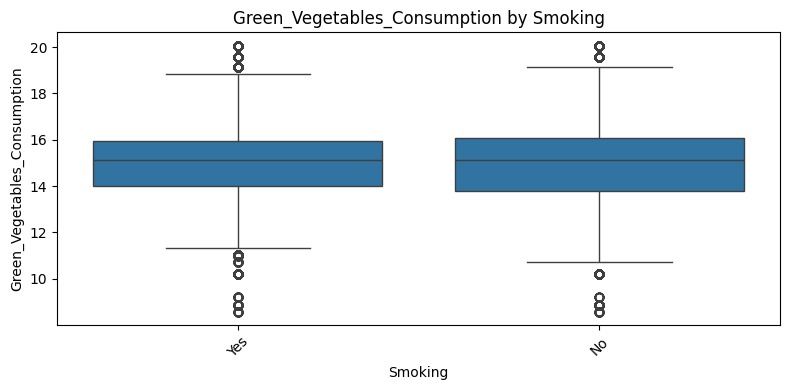

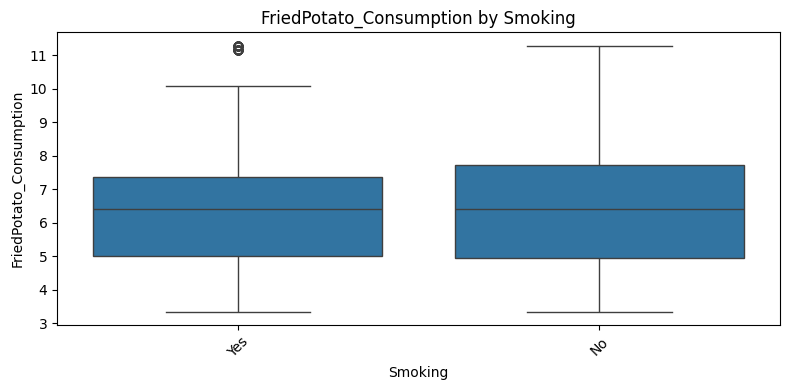

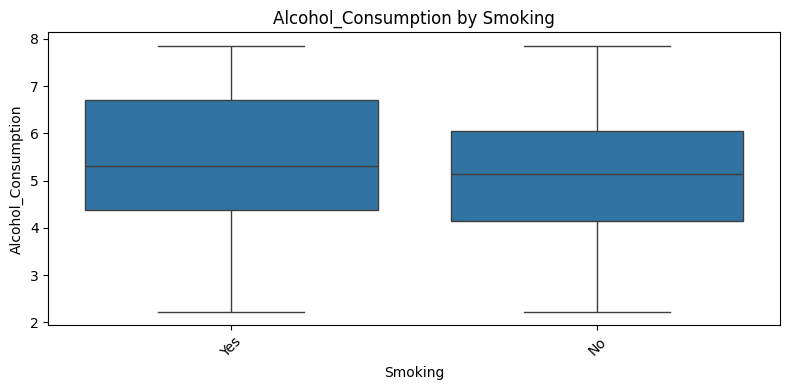

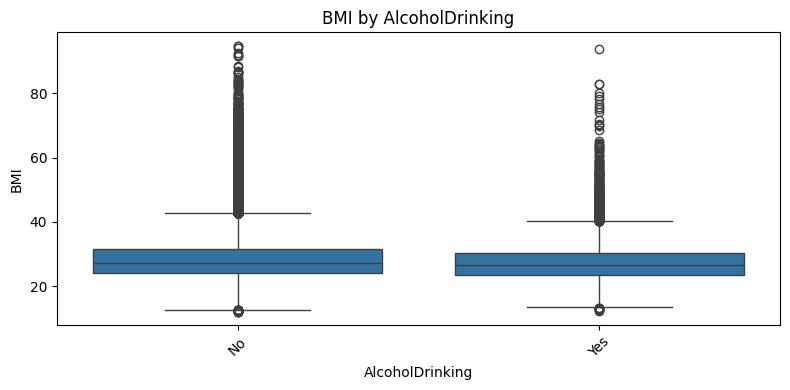

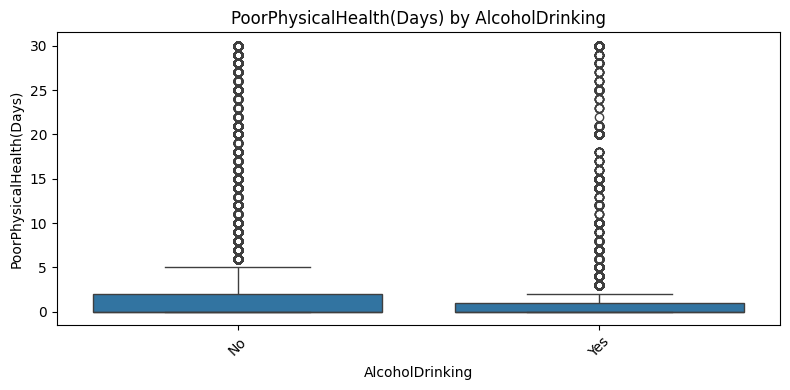

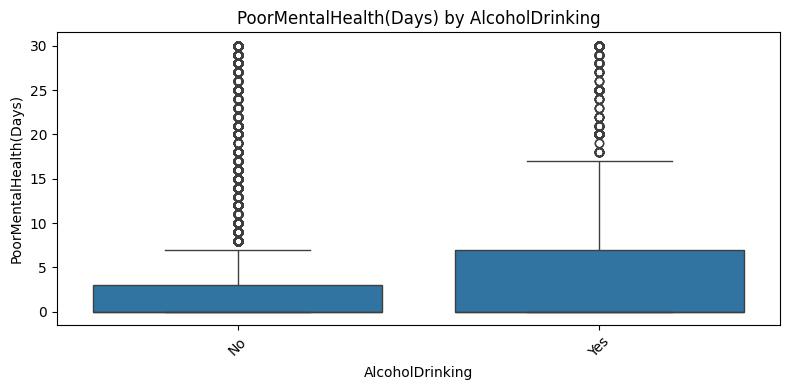

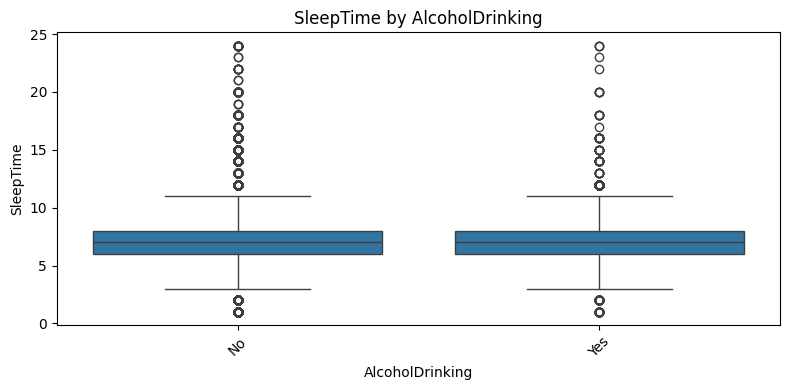

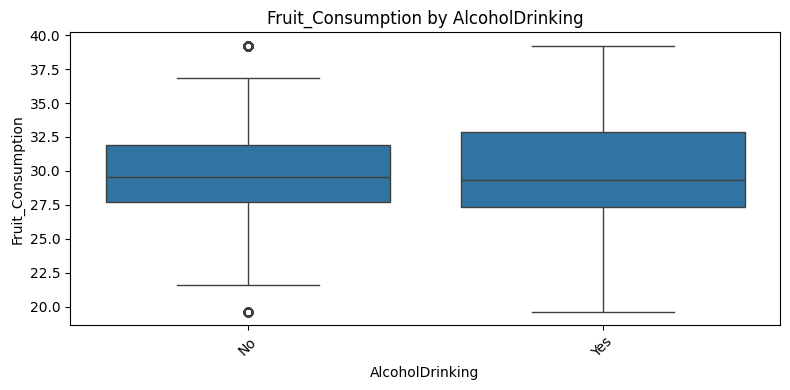

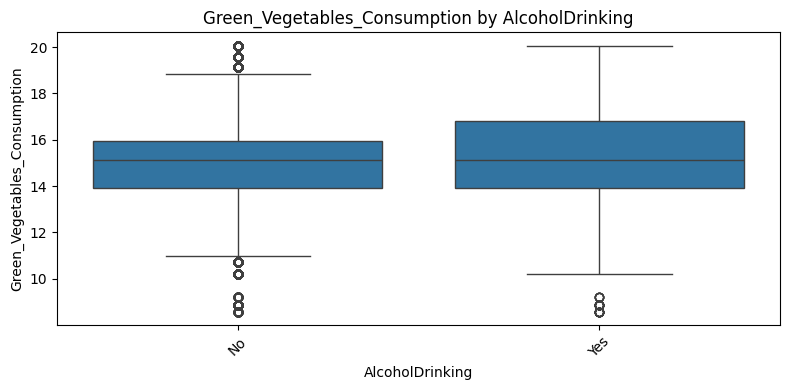

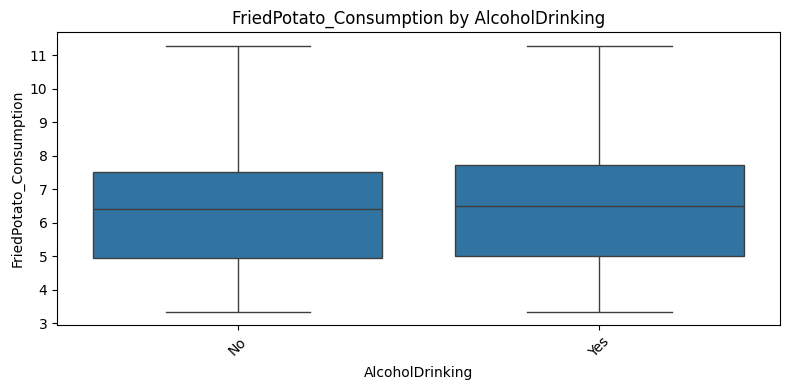

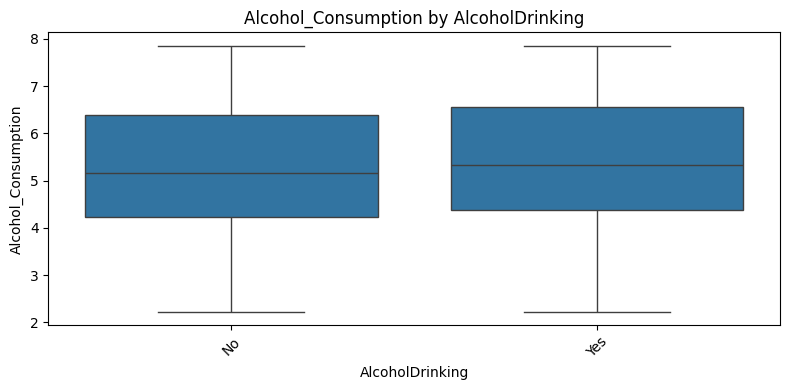

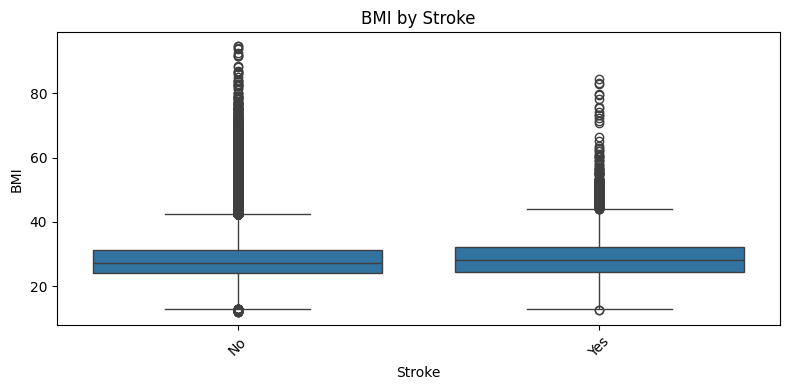

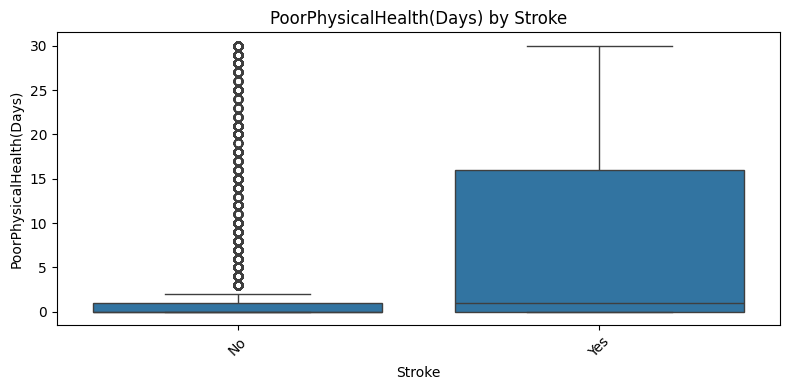

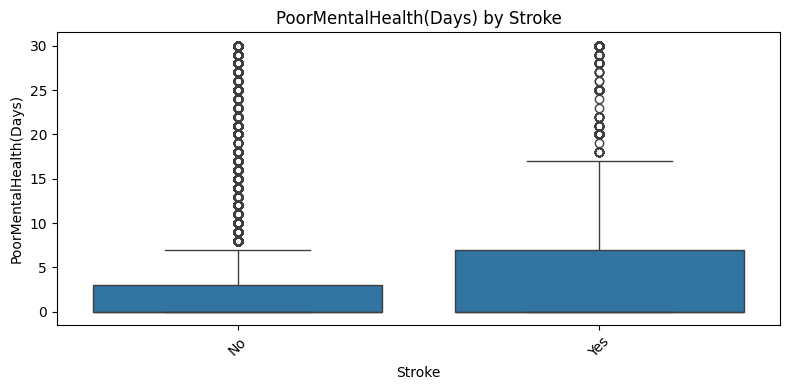

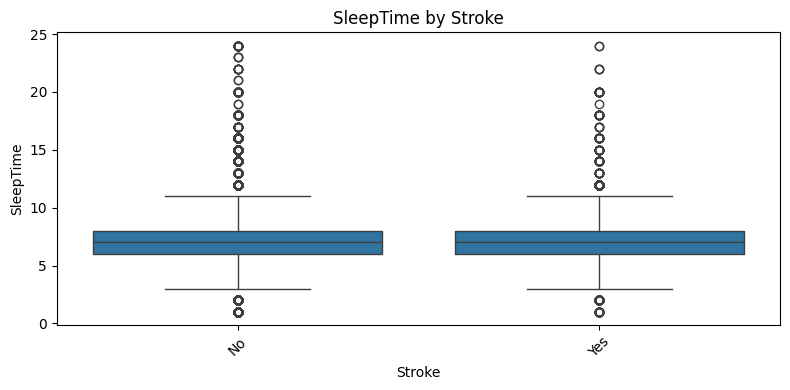

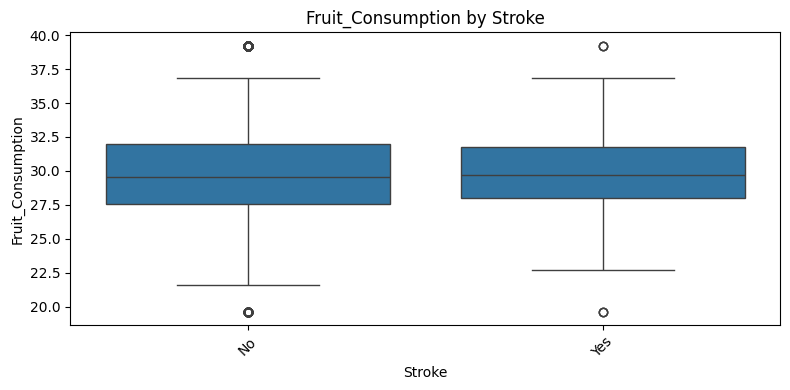

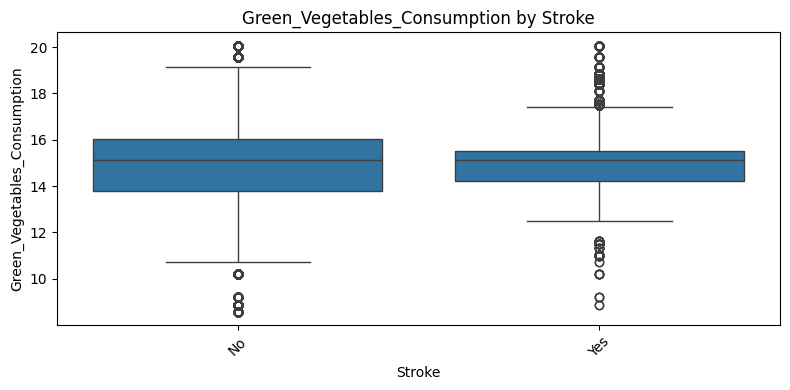

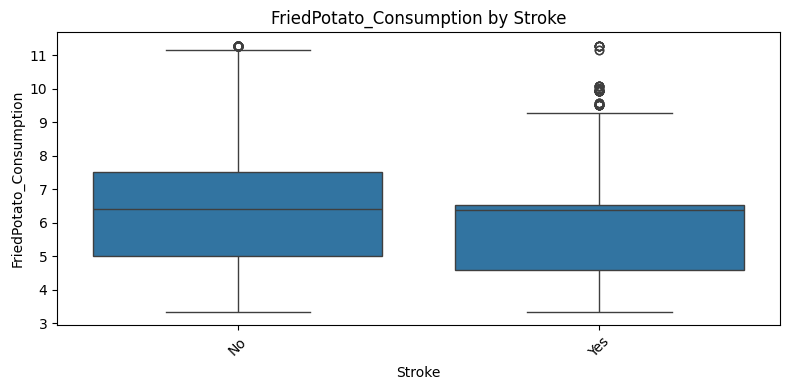

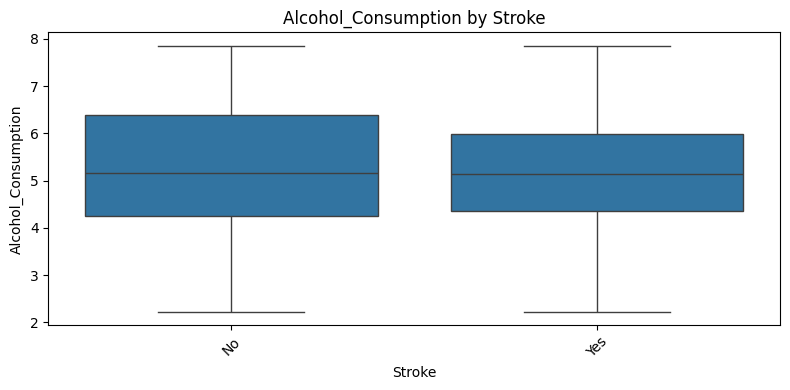

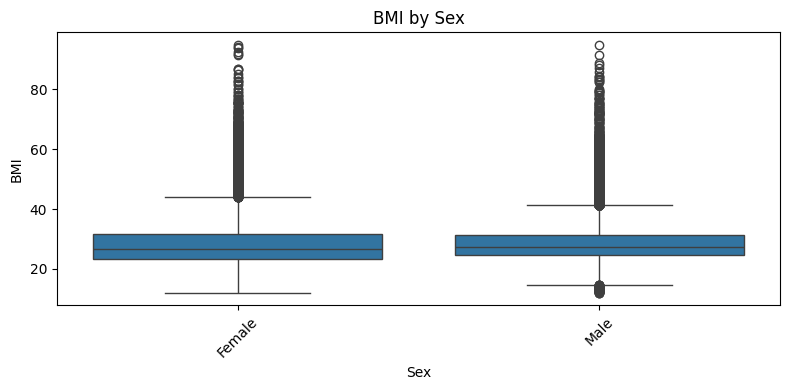

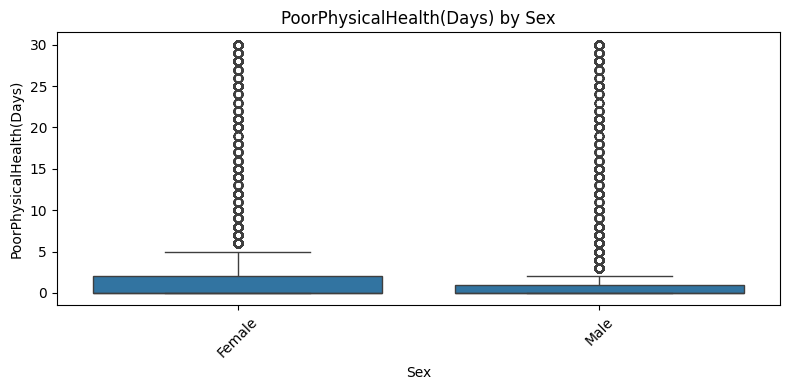

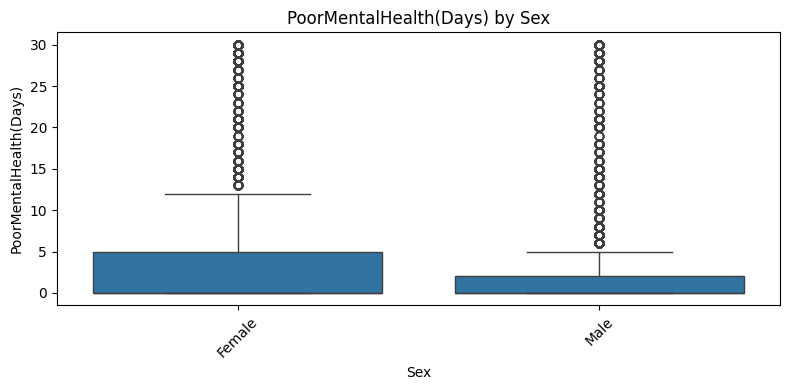

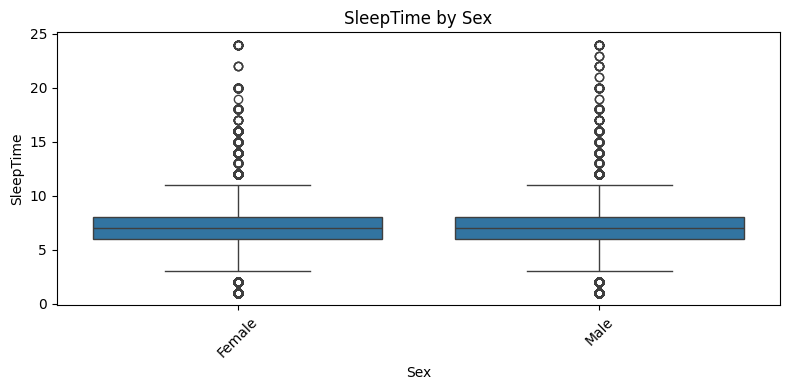

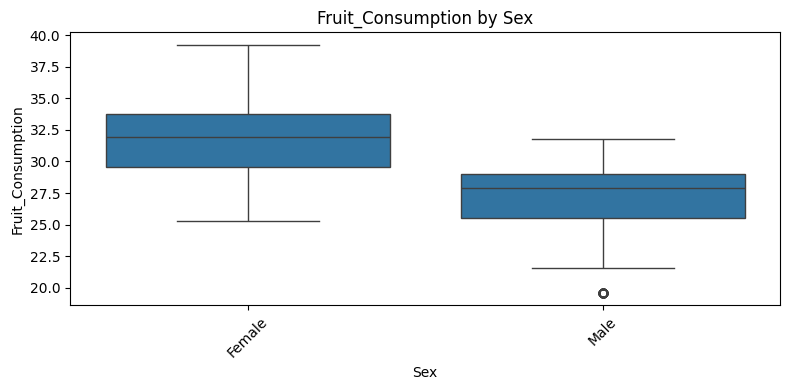

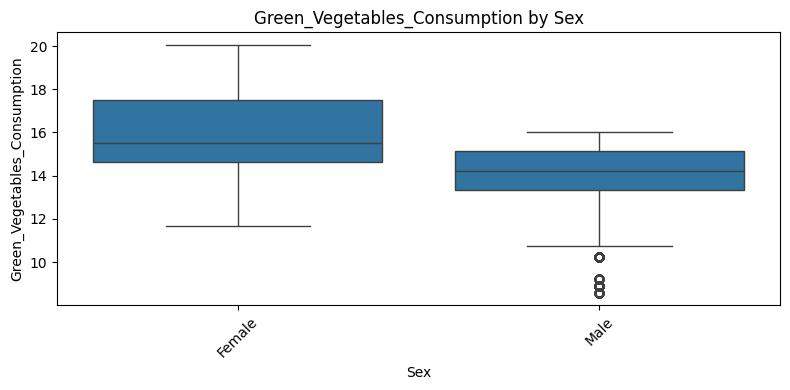

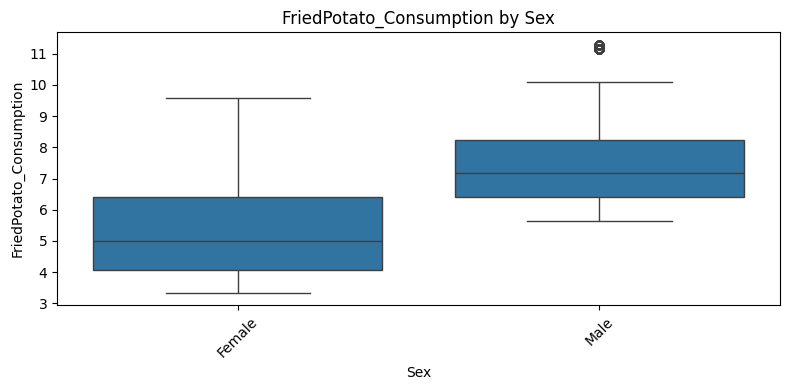

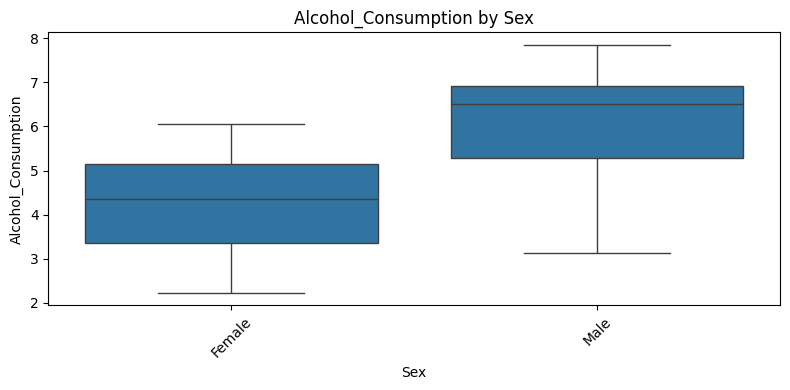

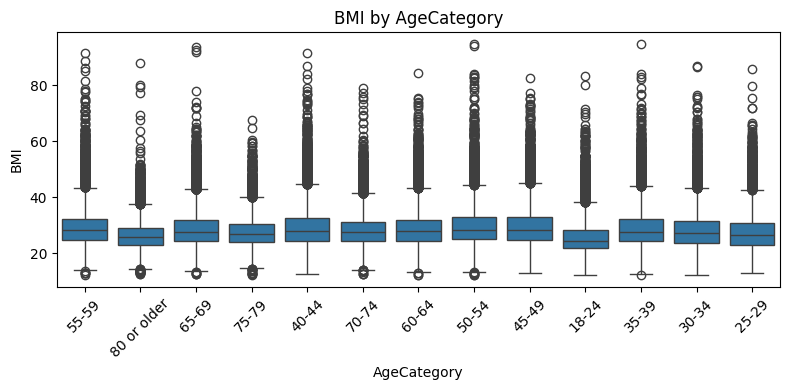

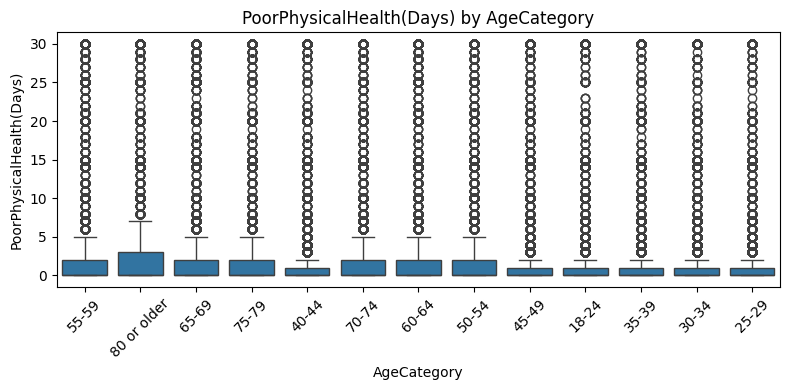

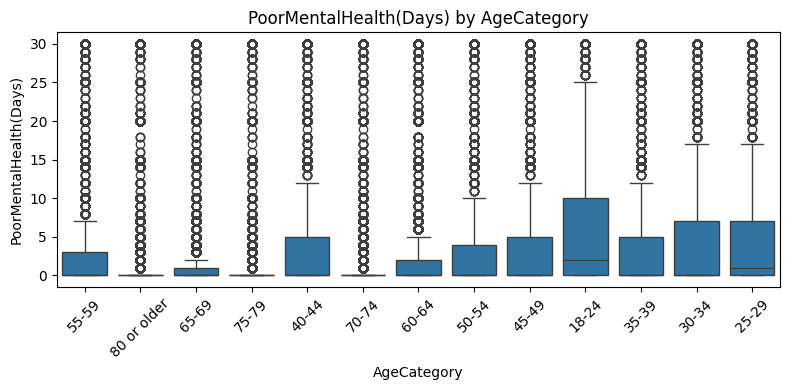

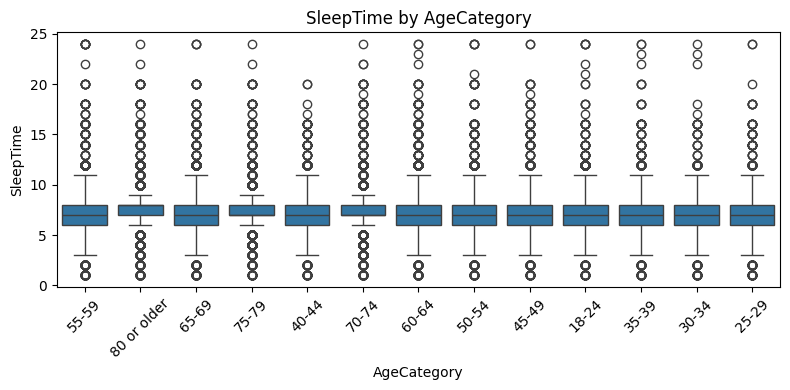

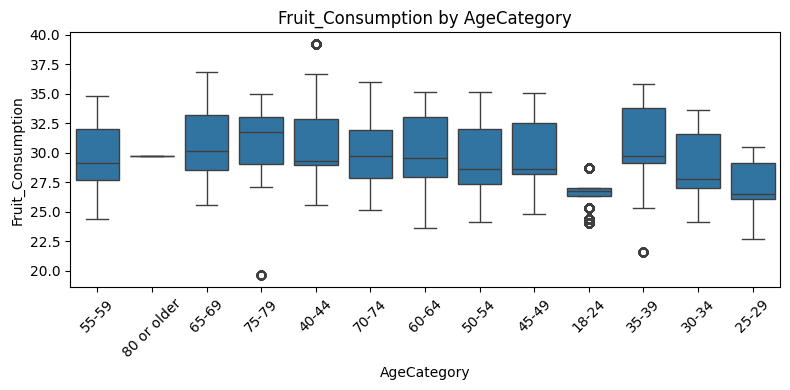

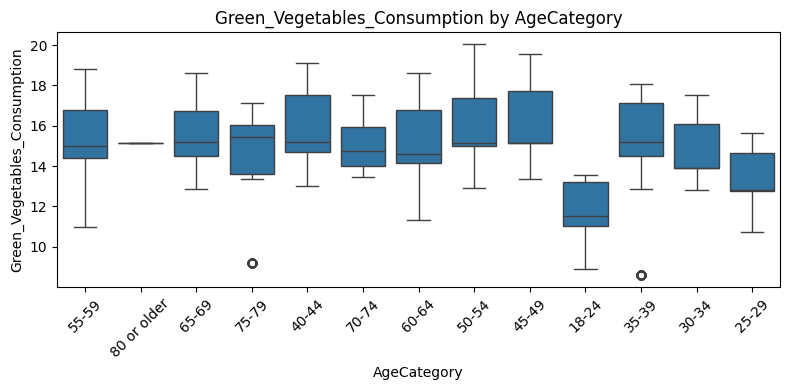

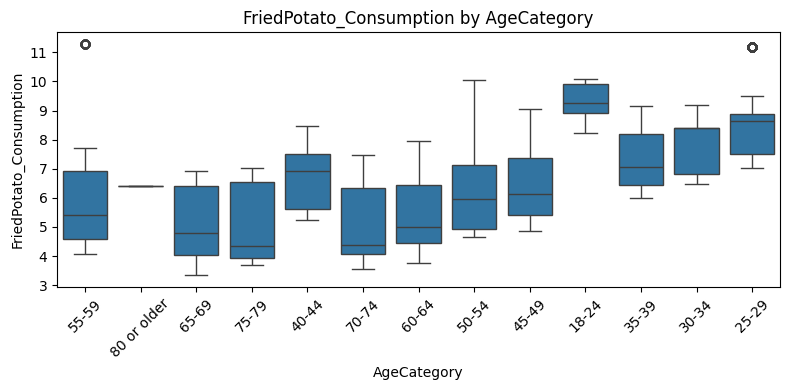

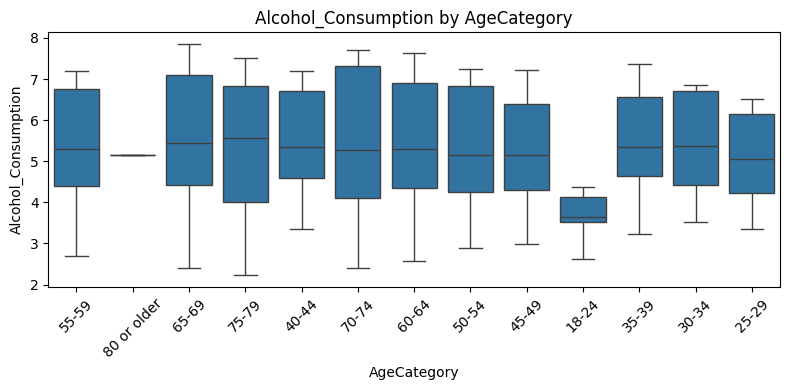

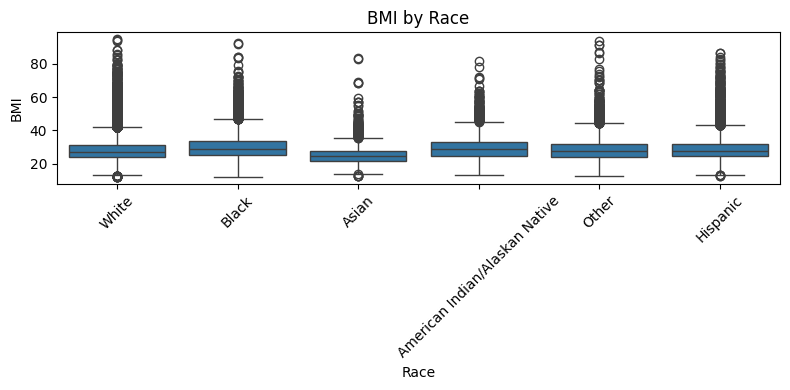

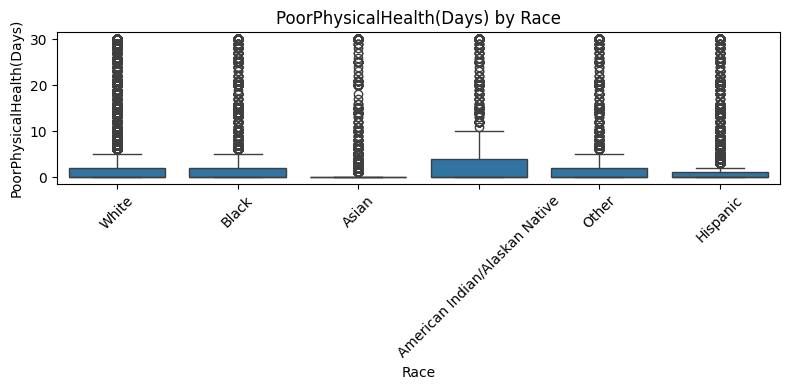

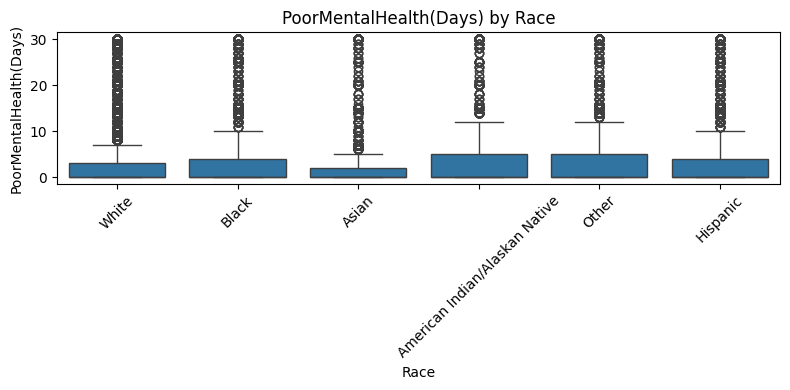

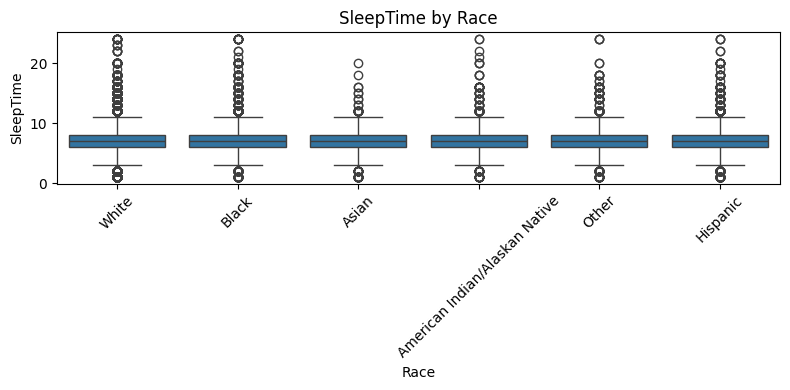

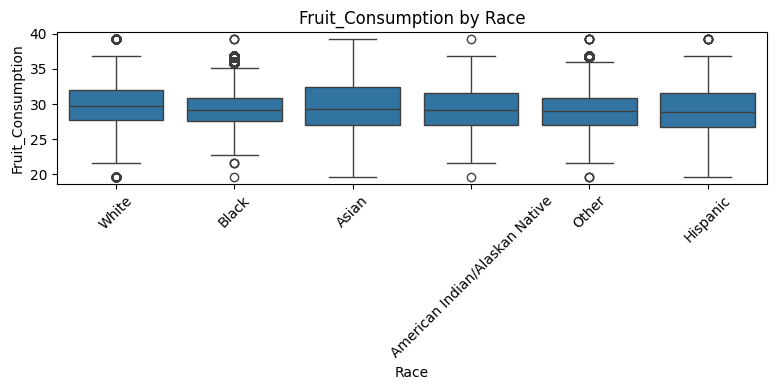

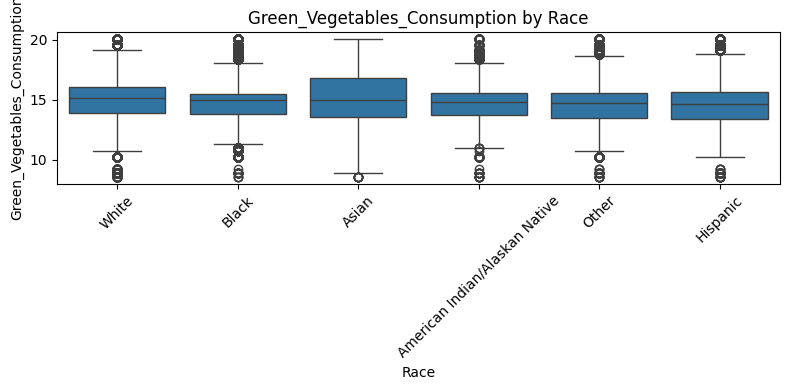

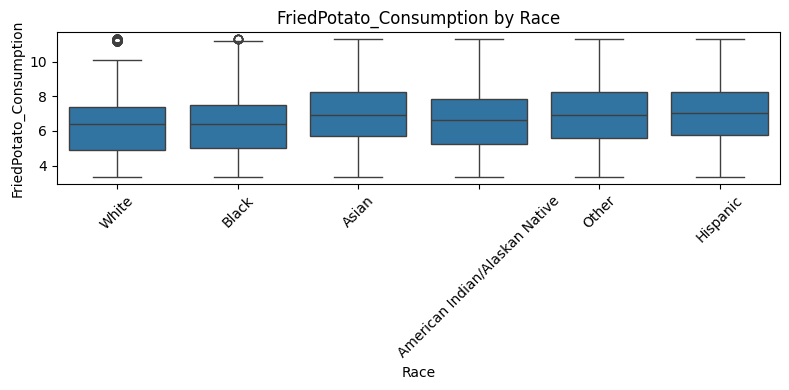

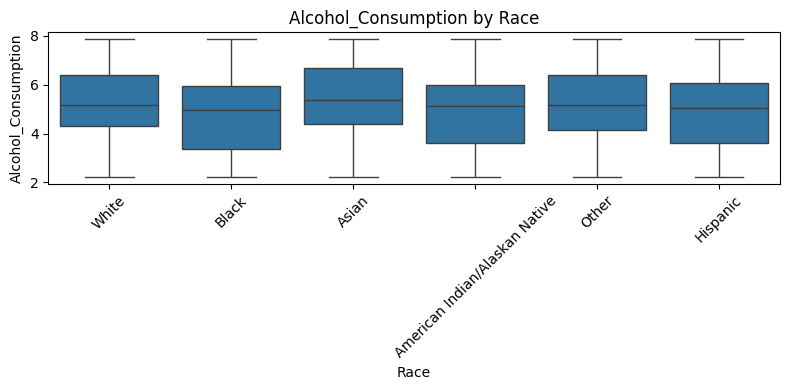

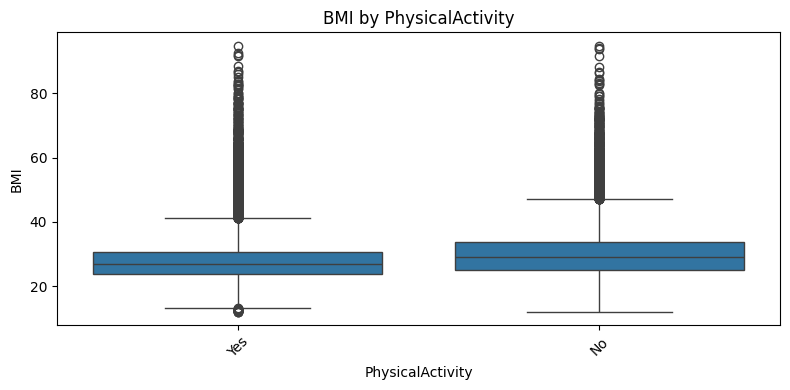

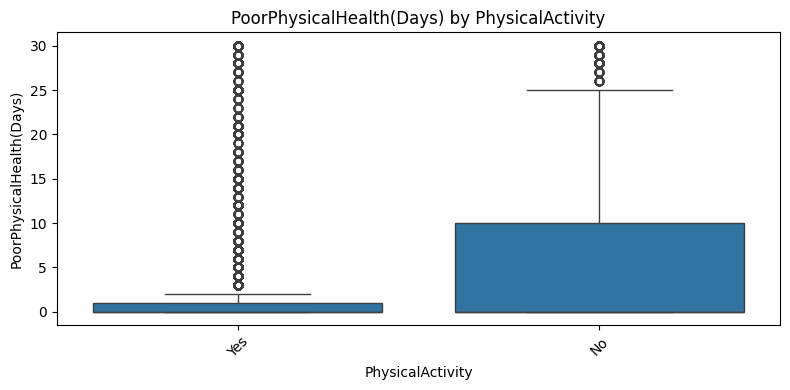

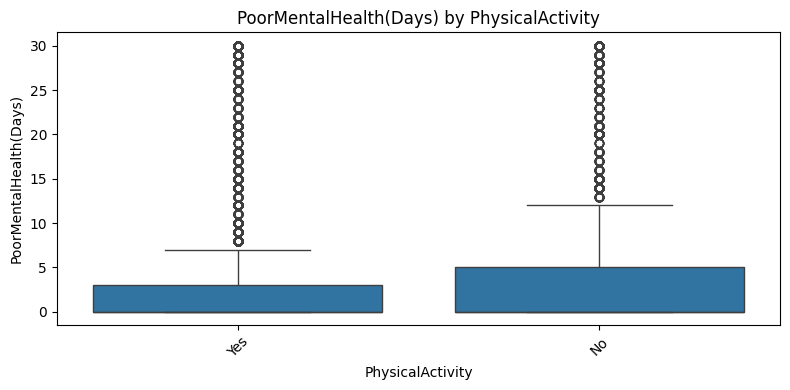

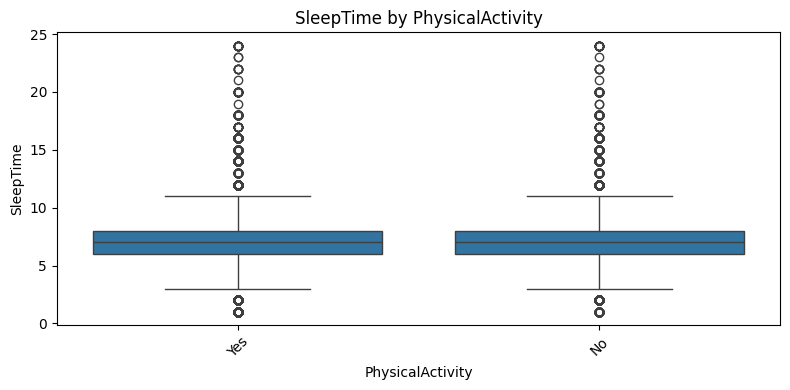

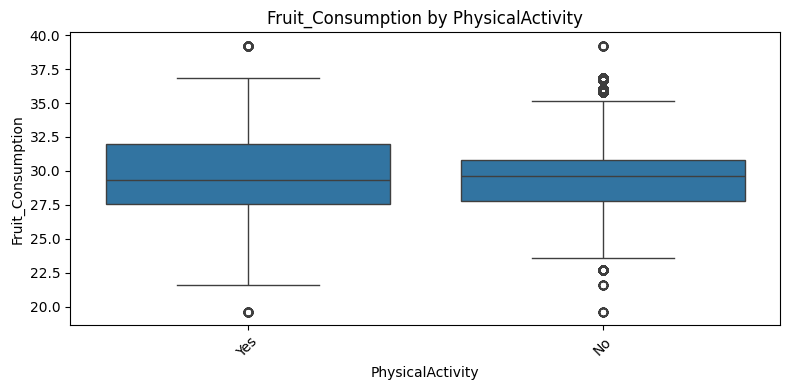

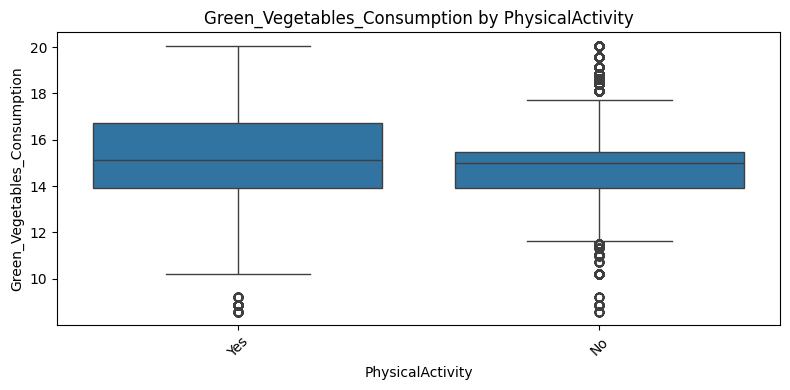

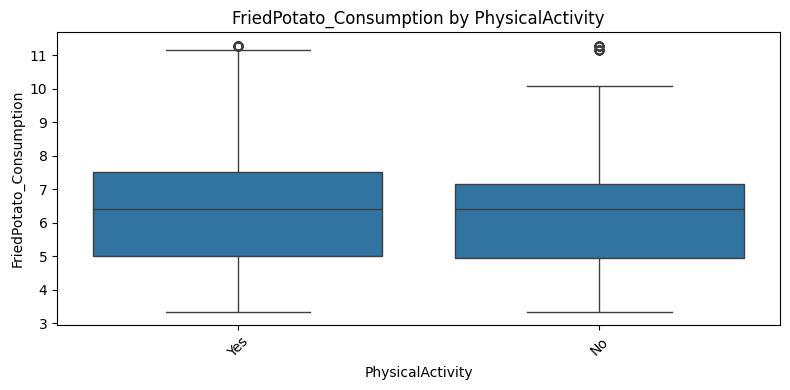

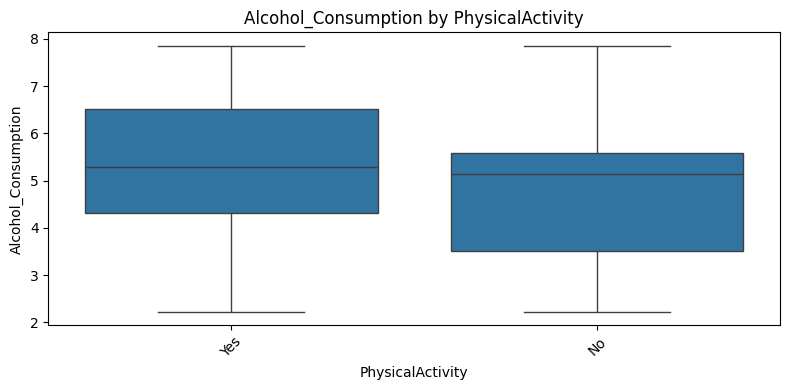

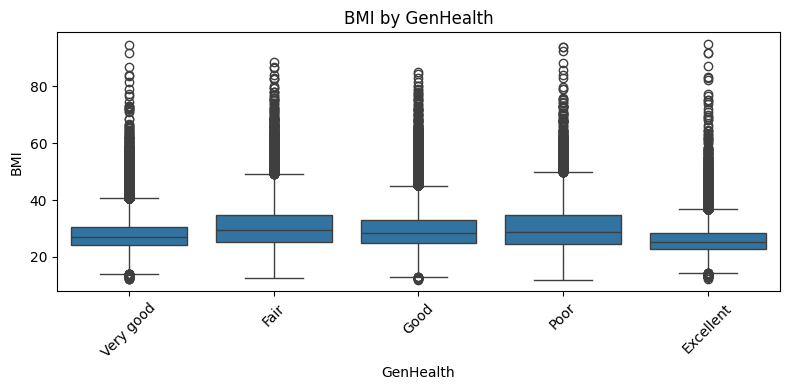

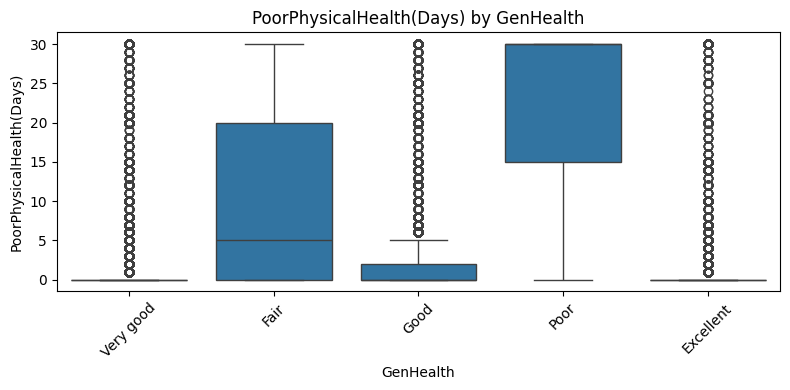

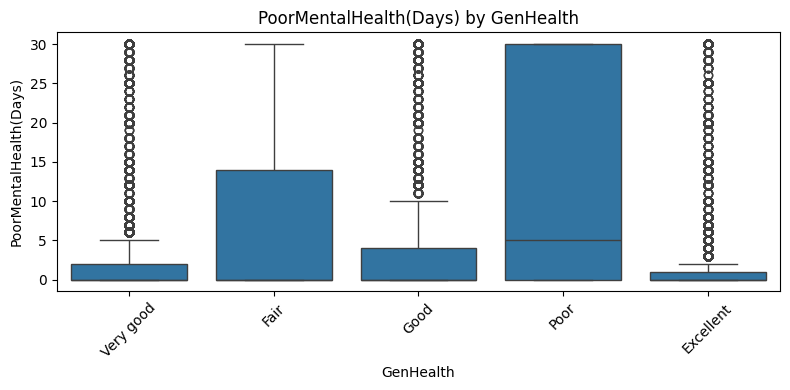

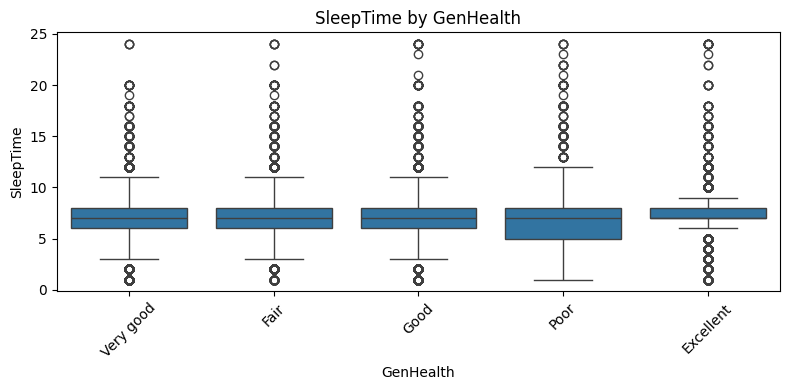

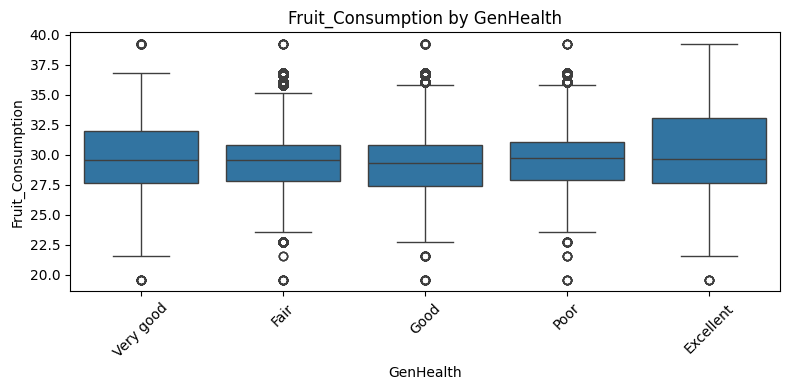

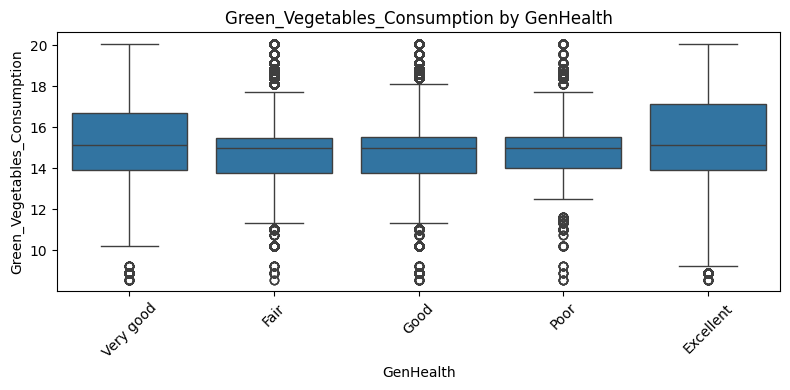

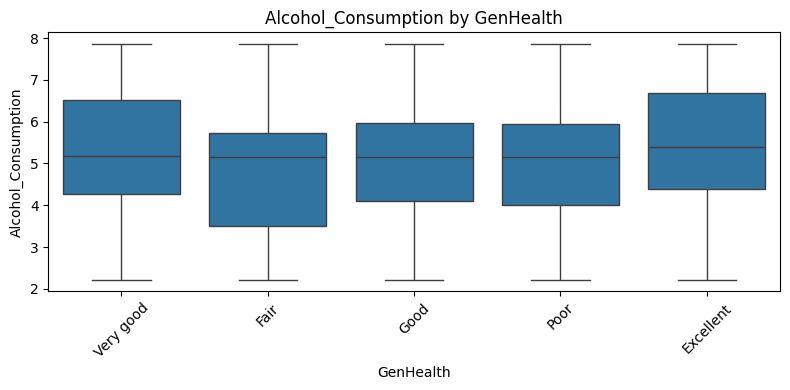

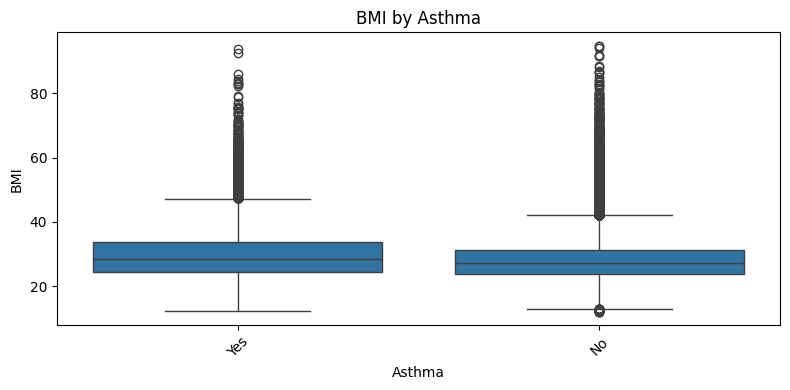

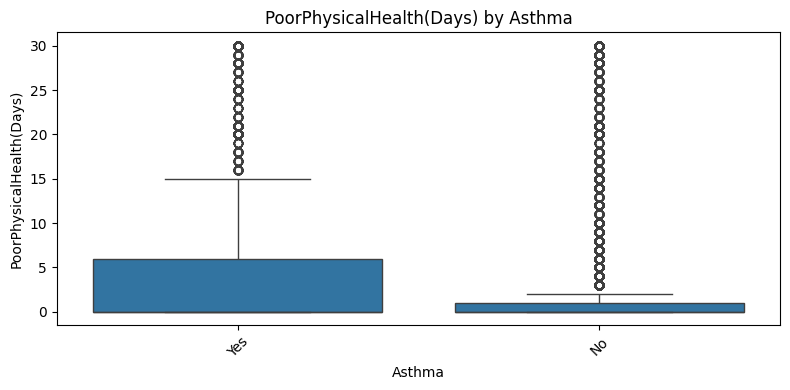

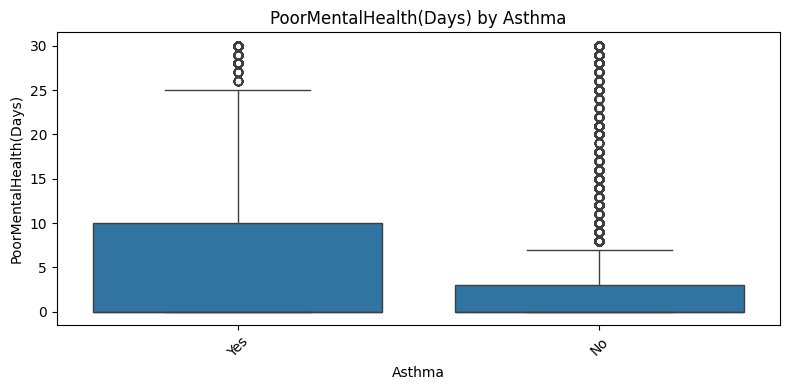

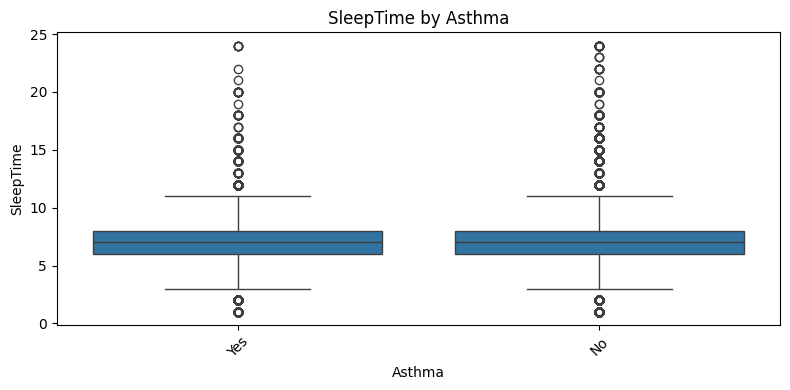

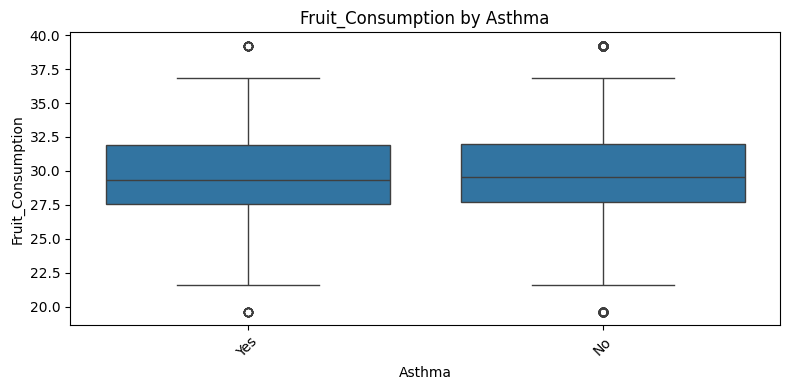

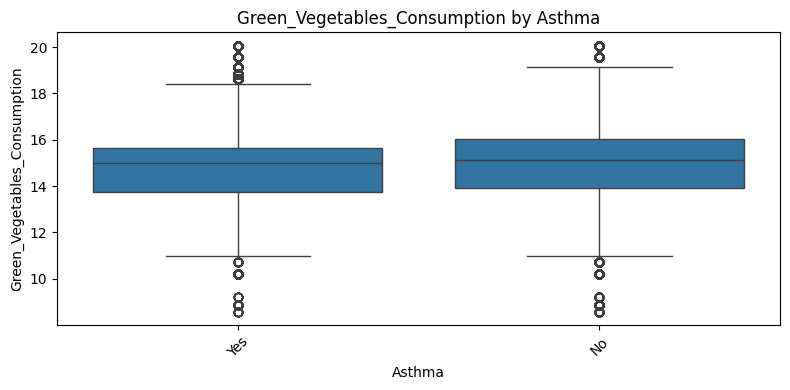

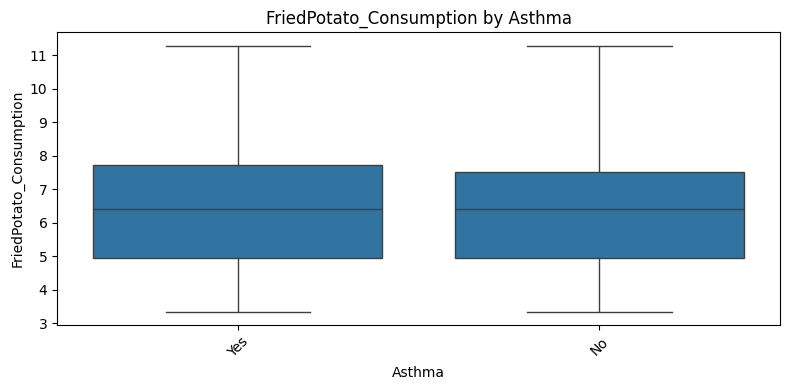

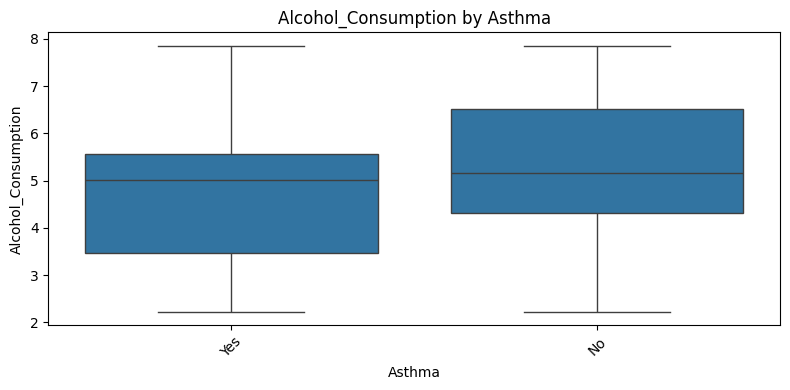

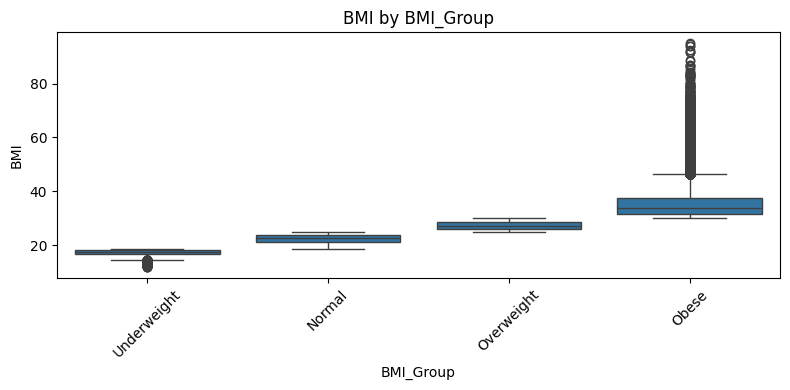

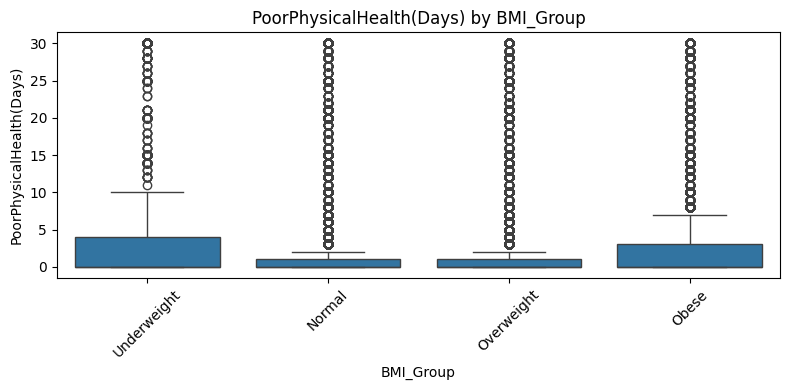

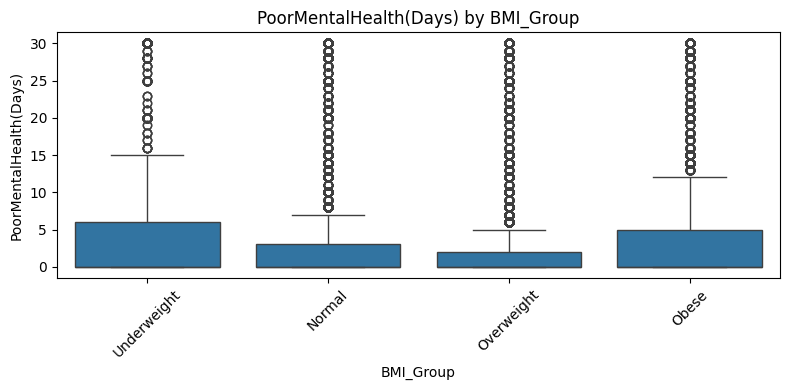

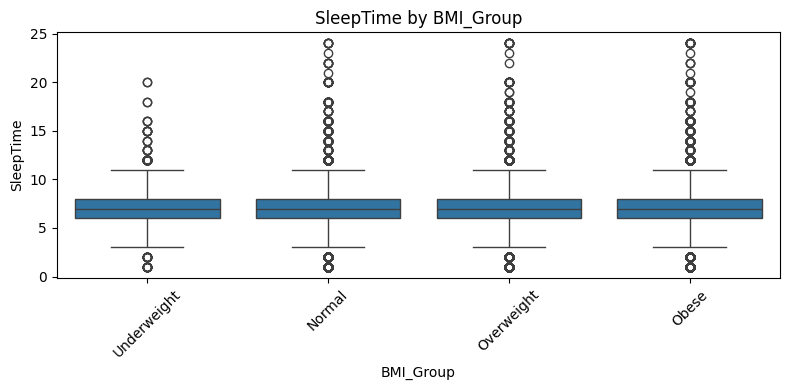

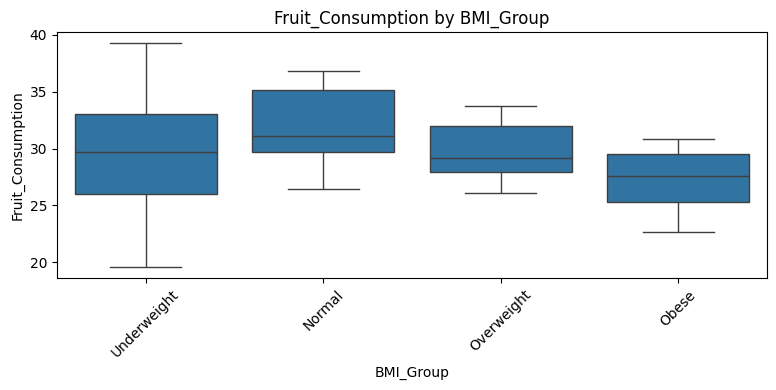

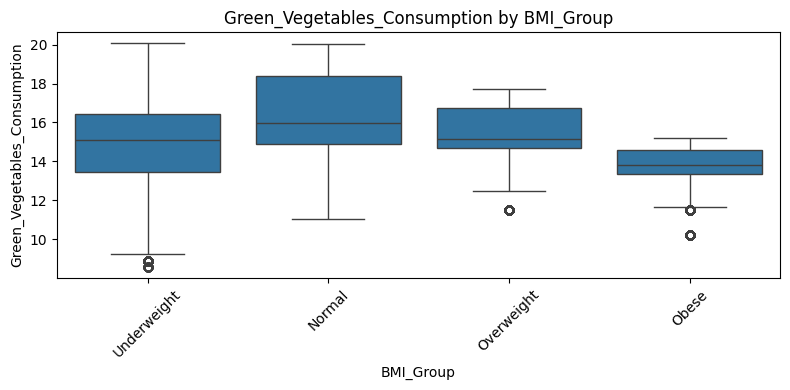

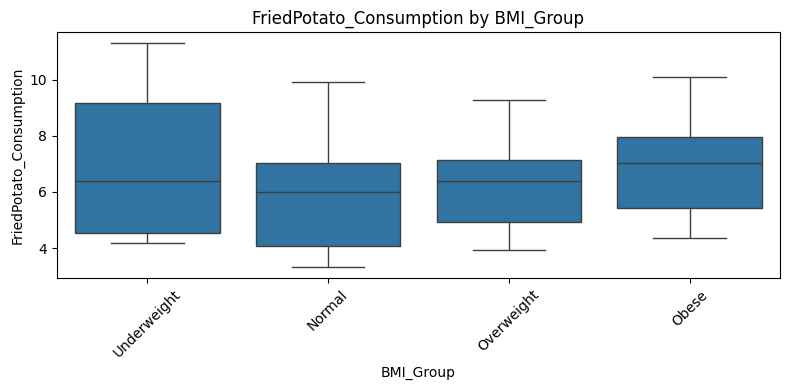

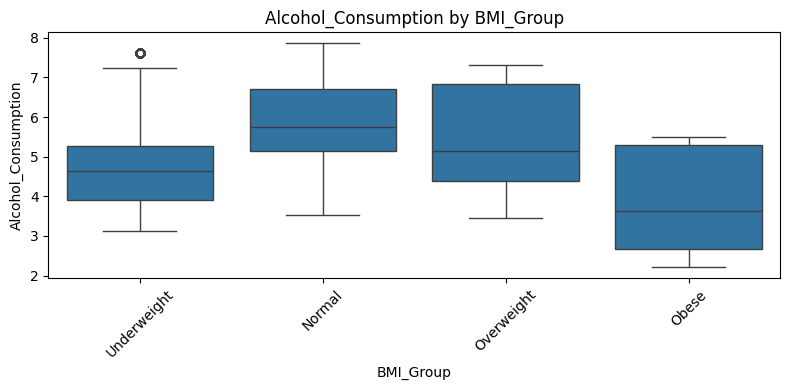

In [6]:
# ---- Numeric vs Numeric ----
for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6, color='purple')
        plt.title(f"{col1} vs {col2}")
        plt.show()

# ---- Categorical vs Numeric ----
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} by {cat}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# 6. Multivariate

C:\Users\patel\AppData\Local\Temp\ipykernel_2832\1821410007.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


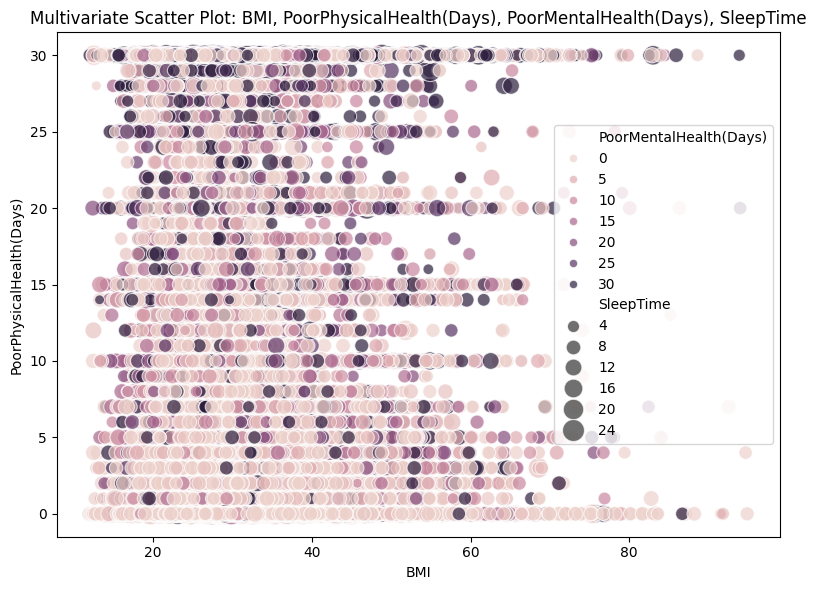

In [12]:
num_df = df.select_dtypes(include=['int64', 'float64'])
cols = num_df.columns  # <-- FIXED: define cols here

if len(cols) >= 4:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=num_df,
        x=cols[0],
        y=cols[1],
        hue=cols[2],   # 3rd variable
        size=cols[3],  # 4th variable
        sizes=(50, 250),
        alpha=0.7
    )
    plt.title(f"Multivariate Scatter Plot: {cols[0]}, {cols[1]}, {cols[2]}, {cols[3]}")
    plt.tight_layout()
    plt.show()
else:
    print("Need at least 4 numerical variables for multivariate scatterplot.")
    

# 7. Correlation Matrix (Heatmap)

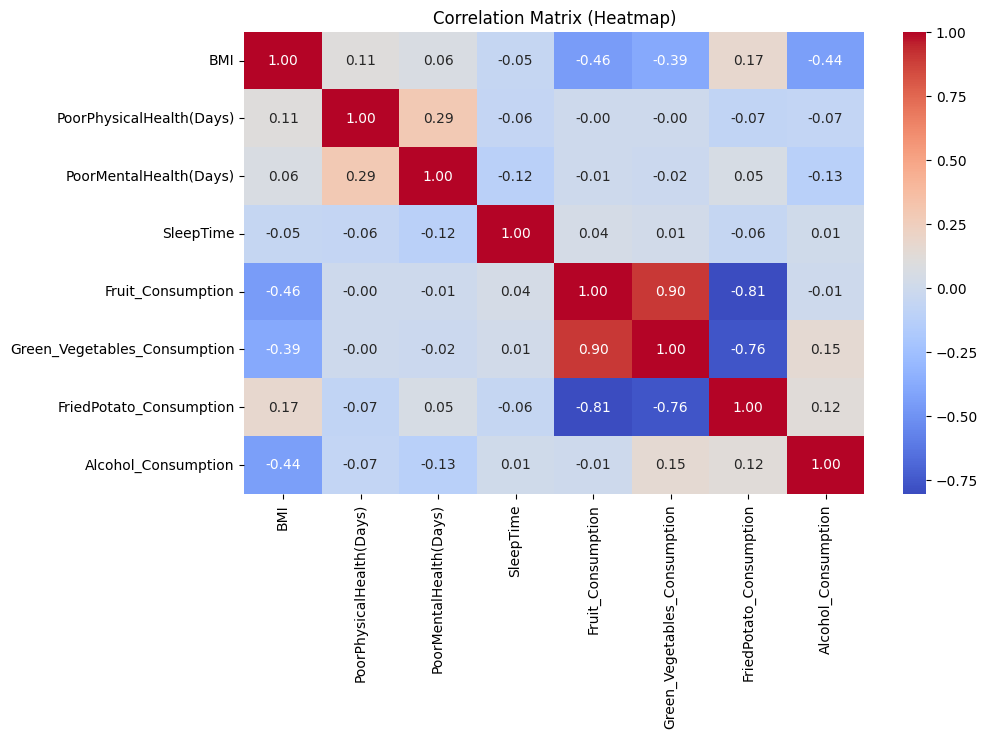

In [13]:

# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Heatmap)")
plt.show()
